# KAMRUL HASSAN

 # Data Science Project (Customer Churn)

# [1. Importing Libraries](#section_id1)
# [1.1 SQL DataBase Connection](#section_id2)
# [1.2 Importing Table from SQL](#section_id3)
# [2. Data Exploration](#section_id4)
# [2.1 Churn Column creation](#section_id5)
# [2.2 Encoding](#section_id6)
# [2.3 Data Visualisation](#section_id7)
# [2.4 Creating hold out sample](#section_id8)
# [3. Feature Selection](#section_id9)
# [4. Multicollinearity](#section_id10)
# [4.1 Descriptive Stats and Visualization - For selected variables](#section_id11)
# [5. Validation](#section_id12)
# [5.1 Model cross validation](#section_id13)
# [5.2 Cross Validation ](#section_id14)
# [6. Model](#section_id15)
# [6.1 KNeighbure](#section_id16)
# [6.2 Random Forest](#section_id17)
# [6.3 Decision Tree](#section_id18)
# [6.4 Naive Bayes](#section_id19)
# [6.5 Neural network](#section_id20)
# [6.6 Gradient Boosting](#section_id21)
# [6.7 Parameter Tuning (Random Forest Classifier)](#section_id22)
# [6.8 Parameter Tuning (Decision Tree Classifier)](#section_id23)
# [6.9 Final Model and Model Performance](#section_id24)
# [6.10 Save Best Model](#section_id25)
# [6.10 Save Best Model](#section_id26)
# [7.Test](#section_id27)
# [7.1 Prepare score data](#section_id28)
# [7.2 load the saved model](#section_id29)
# [7.3 Fit the model](#section_id30)
# [8.Visualise Churn](#section_id31)


# 1. Importing Libraries <a id='section_id1'></a>

In [1]:
import warnings
%matplotlib inline
import datetime as dt
import pyodbc#SQL database connection Library 
import pandas as pd
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
# data colelction and preprocessing
from bs4 import BeautifulSoup
import requests

import csv
# for data visualisation and statistical analysis
import numpy as np
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
plt.rc("font", size=14)
plt.rcParams['figure.figsize'] = (8, 5)

from sklearn import model_selection

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, fbeta_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1.1 SQL DataBase Connection <a id='section_id2'></a>

In [2]:
#Create a connection from Python to SQL
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LENOVO-PC\SQLEXPRESS;"
                      "Database=AdventureWorksDW2012;"
                      "Trusted_Connection=yes;")

### 1.2 Import all the required tables from SQL Server DW <a id='section_id3'></a>

In [3]:
#Import Factinternetsales from AHG SQL Datawarehouse
fctinternetsales = pd.read_sql_query("""
SELECT
[CustomerKey]
,[OrderQuantity]
,[SalesAmount]
,[OrderDate]
,[SalesTerritoryKey]
,[SalesOrderNumber]
FROM [dbo].[FactInternetSales]""", cnxn)

In [4]:
fctinternetsales.head()

,CustomerKey,OrderQuantity,SalesAmount,OrderDate,SalesTerritoryKey,SalesOrderNumber
0,21768,1,3578.2700,2010-12-29,6,SO43697
1,28389,1,3399.9900,2010-12-29,7,SO43698
2,25863,1,3399.9900,2010-12-29,1,SO43699
3,14501,1,699.0982,2010-12-29,4,SO43700
4,11003,1,3399.9900,2010-12-29,9,SO43701


In [5]:
#Import Customer Table SQL datawarehouse using the existing connections
customer = pd.read_sql_query("""
SELECT
[CustomerKey]
,[BirthDate]
,[MaritalStatus]
,[Gender]
,[YearlyIncome]
,[TotalChildren]
,[NumberChildrenAtHome]
,[EnglishEducation]
,[EnglishOccupation]
,[HouseOwnerFlag]
,[NumberCarsOwned]
,[DateFirstPurchase]
,[CommuteDistance]
FROM [dbo].[DimCustomer]""", cnxn)

In [6]:
customer.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance
0,11000,1971-10-06,M,M,90000.0,2,0,Bachelors,Professional,1,0,2011-01-19,1-2 Miles
1,11001,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles
2,11002,1971-02-09,M,M,60000.0,3,3,Bachelors,Professional,1,1,2011-01-07,2-5 Miles
3,11003,1973-08-14,S,F,70000.0,0,0,Bachelors,Professional,0,1,2010-12-29,5-10 Miles
4,11004,1979-08-05,S,F,80000.0,5,5,Bachelors,Professional,1,4,2011-01-23,1-2 Miles


In [7]:
customer.dtypes

CustomerKey               int64
BirthDate                object
MaritalStatus            object
Gender                   object
YearlyIncome            float64
TotalChildren             int64
NumberChildrenAtHome      int64
EnglishEducation         object
EnglishOccupation        object
HouseOwnerFlag           object
NumberCarsOwned           int64
DateFirstPurchase        object
CommuteDistance          object
dtype: object

In [8]:
#Import Factinternetsalesreason from SQL Datawarehouse
fctinternetsalesreason = pd.read_sql_query("""
SELECT *
FROM [dbo].[FactInternetSalesReason]""", cnxn)

In [9]:
fctinternetsalesreason.head()

,SalesOrderNumber,SalesOrderLineNumber,SalesReasonKey
0,SO43697,1,5
1,SO43697,1,9
2,SO43702,1,5
3,SO43702,1,9
4,SO43703,1,5


In [10]:
#Import salesreason from SQL Datawarehouse
salesreason = pd.read_sql_query("""
SELECT *
FROM [dbo].[DimSalesReason]""", cnxn)

In [11]:
salesreason.head()

,SalesReasonKey,SalesReasonAlternateKey,SalesReasonName,SalesReasonReasonType
0,1,1,Price,Other
1,2,2,On Promotion,Promotion
2,3,3,Magazine Advertisement,Marketing
3,4,4,Television Advertisement,Marketing
4,5,5,Manufacturer,Other


# 2. Data Exploration & Features Engineering <a id='section_id4'></a>

### Summarise customer transactions and tag customers based on the churn criteria given

In [12]:
fctinternetsales[fctinternetsales['CustomerKey'] == 13000]

,CustomerKey,OrderQuantity,SalesAmount,OrderDate,SalesTerritoryKey,SalesOrderNumber
3005,13000,1,2071.4196,2012-04-09,9,SO47798
19995,13000,1,2294.9900,2013-05-09,9,SO57737
46232,13000,1,2384.0700,2013-10-23,9,SO69025
46233,13000,1,4.9900,2013-10-23,9,SO69025
46234,13000,1,8.9900,2013-10-23,9,SO69025
46235,13000,1,34.9900,2013-10-23,9,SO69025


In [13]:
#creating data frame for fctintsales without SalesTerritoryKey
Timebtworders = fctinternetsales
Timebtworders = Timebtworders[['SalesOrderNumber','CustomerKey','OrderDate','SalesAmount','OrderQuantity']]
Timebtworders.tail()

,SalesOrderNumber,CustomerKey,OrderDate,SalesAmount,OrderQuantity
60393,SO75122,15868,2014-01-28,21.98,1
60394,SO75122,15868,2014-01-28,8.99,1
60395,SO75123,18759,2014-01-28,21.98,1
60396,SO75123,18759,2014-01-28,159.00,1
60397,SO75123,18759,2014-01-28,8.99,1


In [14]:
#Aggregating new data frame (Timebtworders) by salesamount and orderquantity
Timebtworders = Timebtworders.groupby(['SalesOrderNumber','CustomerKey','OrderDate']).agg({'SalesAmount':'sum', 
                         'OrderQuantity':'sum'})

In [15]:
Timebtworders.head()

,,,SalesAmount,OrderQuantity
SalesOrderNumber,CustomerKey,OrderDate,,
SO43697,21768,2010-12-29,3578.2700,1
SO43698,28389,2010-12-29,3399.9900,1
SO43699,25863,2010-12-29,3399.9900,1
SO43700,14501,2010-12-29,699.0982,1
SO43701,11003,2010-12-29,3399.9900,1


In [16]:
#Join the field names to the newly aggregate fields names
Timebtworders.columns = Timebtworders.columns.ravel()

In [17]:
#Reset the index
Timebtworders = Timebtworders.reset_index()

In [18]:
Timebtworders[Timebtworders['CustomerKey'] == 11000]

,SalesOrderNumber,CustomerKey,OrderDate,SalesAmount,OrderQuantity
96,SO43793,11000,2011-01-19,3399.99,1
5774,SO51522,11000,2013-01-18,2341.97,2
11030,SO57418,11000,2013-05-03,2507.03,5


In [19]:
#check how many columns and rows after aggregation
Timebtworders.shape

(27659, 5)

In [20]:
#sort by cusomer's and orderdate's
Timebtworders.sort_values(['CustomerKey','OrderDate']).head()

,SalesOrderNumber,CustomerKey,OrderDate,SalesAmount,OrderQuantity
96,SO43793,11000,2011-01-19,3399.99,1
5774,SO51522,11000,2013-01-18,2341.97,2
11030,SO57418,11000,2013-05-03,2507.03,5
70,SO43767,11001,2011-01-15,3374.99,1
5745,SO51493,11001,2013-01-16,2419.93,6


In [21]:
#lets find the transaction different day within same customer
Timebtworders['diff'] = Timebtworders.sort_values(['CustomerKey','OrderDate']).groupby('CustomerKey')['OrderDate'].diff()

In [22]:
Timebtworders.sort_values(['CustomerKey','OrderDate']).head()

,SalesOrderNumber,CustomerKey,OrderDate,SalesAmount,OrderQuantity,diff
96,SO43793,11000,2011-01-19,3399.99,1,NaT
5774,SO51522,11000,2013-01-18,2341.97,2,730 days
11030,SO57418,11000,2013-05-03,2507.03,5,105 days
70,SO43767,11001,2011-01-15,3374.99,1,NaT
5745,SO51493,11001,2013-01-16,2419.93,6,732 days


In [23]:
Timebtworders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27659 entries, 0 to 27658
Data columns (total 6 columns):
SalesOrderNumber    27659 non-null object
CustomerKey         27659 non-null int64
OrderDate           27659 non-null datetime64[ns]
SalesAmount         27659 non-null float64
OrderQuantity       27659 non-null int64
diff                9175 non-null timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), timedelta64[ns](1)
memory usage: 1.3+ MB


In [24]:
# change diff columns types to number
Timebtworders['diff'] = Timebtworders['diff'].astype('timedelta64[D]')

In [25]:
#lets check if changed to number
Timebtworders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27659 entries, 0 to 27658
Data columns (total 6 columns):
SalesOrderNumber    27659 non-null object
CustomerKey         27659 non-null int64
OrderDate           27659 non-null datetime64[ns]
SalesAmount         27659 non-null float64
OrderQuantity       27659 non-null int64
diff                9175 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [26]:
Timebtworders.sort_values(['CustomerKey','OrderDate']).head()

,SalesOrderNumber,CustomerKey,OrderDate,SalesAmount,OrderQuantity,diff
96,SO43793,11000,2011-01-19,3399.99,1,NaN
5774,SO51522,11000,2013-01-18,2341.97,2,730.0
11030,SO57418,11000,2013-05-03,2507.03,5,105.0
70,SO43767,11001,2011-01-15,3374.99,1,NaN
5745,SO51493,11001,2013-01-16,2419.93,6,732.0


In [27]:
#fill NaN by 0
Timebtworders['diff'] = Timebtworders['diff'].fillna(0).astype(int)

In [28]:
# check if NaN changed to 0
Timebtworders.sort_values(['CustomerKey','OrderDate']).head()

,SalesOrderNumber,CustomerKey,OrderDate,SalesAmount,OrderQuantity,diff
96,SO43793,11000,2011-01-19,3399.99,1,0
5774,SO51522,11000,2013-01-18,2341.97,2,730
11030,SO57418,11000,2013-05-03,2507.03,5,105
70,SO43767,11001,2011-01-15,3374.99,1,0
5745,SO51493,11001,2013-01-16,2419.93,6,732


In [29]:
# create a new data frame
# aggregating by sum, max, min, mean and median for customers
new_fctinternetsales = Timebtworders.groupby('CustomerKey').agg({'SalesAmount':['sum', 'max', 'min','mean','median'], 
                         'OrderQuantity':['sum', 'max', 'min','mean','median'], 
                         'OrderDate':'max','diff':['sum', 'max', 'min','mean','median']})

In [30]:
new_fctinternetsales.head()

SalesAmount                                         OrderQuantity  \
                    sum      max      min         mean   median           sum   
CustomerKey                                                                     
11000           8248.99  3399.99  2341.97  2749.663333  2507.03             8   
11001           6383.88  3374.99   588.96  2127.960000  2419.93            11   
11002           8114.04  3399.99  2294.99  2704.680000  2419.06             4   
11003           8139.29  3399.99  2318.96  2713.096667  2420.34             9   
11004           8196.01  3399.99  2376.96  2732.003333  2419.06             6   

                                      OrderDate  diff                       \
            max min      mean median        max   sum  max min        mean   
CustomerKey                                                                  
11000         5   1  2.666667    2.0 2013-05-03   835  730   0  278.333333   
11001         6   1  3.666667    4.0 2013-12-10  1060  732   0  353.333333   
11002         2   1  1.333333    1.0 2013-02-23   778  724   0  259.333333   
11003         4   1  3.000000    4.0 2013-05-10   863  738   0  287.666667   
11004         3   1  2.000000    2.0 2013-05-01   829  730   0  276.333333   

                    
            median  
CustomerKey         
11000        105.0  
11001        328.0  
11002         54.0  
11003        125.0  
11004         99.0

In [31]:
#Join the field names to the newly aggregate fields names
new_fctinternetsales.columns = ["_".join(new_fctinternetsales) for new_fctinternetsales in new_fctinternetsales.columns.ravel()]
new_fctinternetsales.head()

,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,OrderQuantity_median,OrderDate_max,diff_sum,diff_max,diff_min,diff_mean,diff_median
CustomerKey,,,,,,,,,,,,,,,,
11000,8248.99,3399.99,2341.97,2749.663333,2507.03,8,5,1,2.666667,2.0,2013-05-03,835,730,0,278.333333,105.0
11001,6383.88,3374.99,588.96,2127.960000,2419.93,11,6,1,3.666667,4.0,2013-12-10,1060,732,0,353.333333,328.0
11002,8114.04,3399.99,2294.99,2704.680000,2419.06,4,2,1,1.333333,1.0,2013-02-23,778,724,0,259.333333,54.0
11003,8139.29,3399.99,2318.96,2713.096667,2420.34,9,4,1,3.000000,4.0,2013-05-10,863,738,0,287.666667,125.0
11004,8196.01,3399.99,2376.96,2732.003333,2419.06,6,3,1,2.000000,2.0,2013-05-01,829,730,0,276.333333,99.0


In [32]:
#Reset the index
new_fctinternetsales = new_fctinternetsales.reset_index()
new_fctinternetsales.head()

,CustomerKey,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,OrderQuantity_median,OrderDate_max,diff_sum,diff_max,diff_min,diff_mean,diff_median
0,11000,8248.99,3399.99,2341.97,2749.663333,2507.03,8,5,1,2.666667,2.0,2013-05-03,835,730,0,278.333333,105.0
1,11001,6383.88,3374.99,588.96,2127.960000,2419.93,11,6,1,3.666667,4.0,2013-12-10,1060,732,0,353.333333,328.0
2,11002,8114.04,3399.99,2294.99,2704.680000,2419.06,4,2,1,1.333333,1.0,2013-02-23,778,724,0,259.333333,54.0
3,11003,8139.29,3399.99,2318.96,2713.096667,2420.34,9,4,1,3.000000,4.0,2013-05-10,863,738,0,287.666667,125.0
4,11004,8196.01,3399.99,2376.96,2732.003333,2419.06,6,3,1,2.000000,2.0,2013-05-01,829,730,0,276.333333,99.0


In [33]:
new_fctinternetsales.shape

(18484, 17)

In [34]:
customer.shape

(18484, 13)

In [35]:
#Merging the aggregated field with customer table
new_data = pd.merge(new_fctinternetsales,
                 customer,
                 on='CustomerKey')
new_data.head()

,CustomerKey,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,...,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance
0,11000,8248.99,3399.99,2341.97,2749.663333,2507.03,8,5,1,2.666667,...,M,90000.0,2,0,Bachelors,Professional,1,0,2011-01-19,1-2 Miles
1,11001,6383.88,3374.99,588.96,2127.960000,2419.93,11,6,1,3.666667,...,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles
2,11002,8114.04,3399.99,2294.99,2704.680000,2419.06,4,2,1,1.333333,...,M,60000.0,3,3,Bachelors,Professional,1,1,2011-01-07,2-5 Miles
3,11003,8139.29,3399.99,2318.96,2713.096667,2420.34,9,4,1,3.000000,...,F,70000.0,0,0,Bachelors,Professional,0,1,2010-12-29,5-10 Miles
4,11004,8196.01,3399.99,2376.96,2732.003333,2419.06,6,3,1,2.000000,...,F,80000.0,5,5,Bachelors,Professional,1,4,2011-01-23,1-2 Miles


In [36]:
new_data.shape

(18484, 29)

In [37]:
#Prepare Salesreason data and merge required tables
reason = pd.merge(fctinternetsalesreason,
                 salesreason,
                 on='SalesReasonKey')
reason.head()

,SalesOrderNumber,SalesOrderLineNumber,SalesReasonKey,SalesReasonAlternateKey,SalesReasonName,SalesReasonReasonType
0,SO43697,1,5,5,Manufacturer,Other
1,SO43702,1,5,5,Manufacturer,Other
2,SO43703,1,5,5,Manufacturer,Other
3,SO43706,1,5,5,Manufacturer,Other
4,SO43707,1,5,5,Manufacturer,Other


In [38]:
reason.shape

(64515, 6)

In [39]:
#make Dummy to the Salesreason name so that the values becomes variables
reason_ = pd.get_dummies(reason.SalesReasonName,columns=['Price', 'On Promotion', 'Magazine Advertisement','TV'
                                                         , 'Manufacturer', 'Review','Demo Event', 'Sponsorship'
                                                         , 'Quality', 'Other'])

In [40]:
reason_.head()

,Manufacturer,On Promotion,Other,Price,Quality,Review,Television Advertisement
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [41]:
#Concatenate reason and reason_
new_reason = pd.concat([reason, reason_], axis=1)
new_reason.head()

,SalesOrderNumber,SalesOrderLineNumber,SalesReasonKey,SalesReasonAlternateKey,SalesReasonName,SalesReasonReasonType,Manufacturer,On Promotion,Other,Price,Quality,Review,Television Advertisement
0,SO43697,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0
1,SO43702,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0
2,SO43703,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0
3,SO43706,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0
4,SO43707,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0


In [42]:
#show unique salesreason name
new_reason.SalesReasonName.unique()

array(['Manufacturer', 'Quality', 'On Promotion', 'Review', 'Price',
       'Other', 'Television  Advertisement'], dtype=object)

In [43]:
#Re Import Factinternetsales from SQL Datawarehouse
fctinternetsales = pd.read_sql_query("""
SELECT
[CustomerKey]
,[SalesOrderNumber]
FROM [dbo].[FactInternetSales]""", cnxn)

In [44]:
fctinternetsales.shape

(60398, 2)

In [45]:
#Join factinternetsales back to prepared Salesreason data
join_reason = pd.merge(fctinternetsales,
                 new_reason,
                 on='SalesOrderNumber')

In [46]:
join_reason.head()

,CustomerKey,SalesOrderNumber,SalesOrderLineNumber,SalesReasonKey,SalesReasonAlternateKey,SalesReasonName,SalesReasonReasonType,Manufacturer,On Promotion,Other,Price,Quality,Review,Television Advertisement
0,21768,SO43697,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0
1,21768,SO43697,1,9,9,Quality,Other,0,0,0,0,1,0,0
2,27645,SO43702,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0
3,27645,SO43702,1,9,9,Quality,Other,0,0,0,0,1,0,0
4,16624,SO43703,1,5,5,Manufacturer,Other,1,0,0,0,0,0,0


In [47]:
join_reason.shape

(188157, 14)

In [48]:
#Aggregate Sales Reason to prevent duplication of customer information
reason_agg = join_reason.groupby('CustomerKey').agg({'Manufacturer':'max', 
                         'On Promotion':'max', 
                         'Other':'max',
                          'Price':'max',
                            'Quality':'max',
                              'Review':'max',
                                'Television  Advertisement':'max'}).reset_index()

In [49]:
reason_agg.head()

,CustomerKey,Manufacturer,On Promotion,Other,Price,Quality,Review,Television Advertisement
0,11000,0,1,0,1,0,0,0
1,11001,0,0,0,1,0,0,0
2,11002,0,1,0,0,0,0,0
3,11003,0,0,0,1,0,0,0
4,11004,0,0,0,1,0,0,0


In [50]:
reason_agg.shape

(17022, 8)

In [51]:
#left join main data back to summarise sales reason data
full_data = pd.merge(new_data,
                 reason_agg,
                 on='CustomerKey', how='left')

In [52]:
full_data.head()

,CustomerKey,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,...,NumberCarsOwned,DateFirstPurchase,CommuteDistance,Manufacturer,On Promotion,Other,Price,Quality,Review,Television Advertisement
0,11000,8248.99,3399.99,2341.97,2749.663333,2507.03,8,5,1,2.666667,...,0,2011-01-19,1-2 Miles,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,11001,6383.88,3374.99,588.96,2127.960000,2419.93,11,6,1,3.666667,...,1,2011-01-15,0-1 Miles,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,11002,8114.04,3399.99,2294.99,2704.680000,2419.06,4,2,1,1.333333,...,1,2011-01-07,2-5 Miles,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,11003,8139.29,3399.99,2318.96,2713.096667,2420.34,9,4,1,3.000000,...,1,2010-12-29,5-10 Miles,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11004,8196.01,3399.99,2376.96,2732.003333,2419.06,6,3,1,2.000000,...,4,2011-01-23,1-2 Miles,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
full_data.shape

(18484, 36)

In [54]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 36 columns):
CustomerKey                  18484 non-null int64
SalesAmount_sum              18484 non-null float64
SalesAmount_max              18484 non-null float64
SalesAmount_min              18484 non-null float64
SalesAmount_mean             18484 non-null float64
SalesAmount_median           18484 non-null float64
OrderQuantity_sum            18484 non-null int64
OrderQuantity_max            18484 non-null int64
OrderQuantity_min            18484 non-null int64
OrderQuantity_mean           18484 non-null float64
OrderQuantity_median         18484 non-null float64
OrderDate_max                18484 non-null datetime64[ns]
diff_sum                     18484 non-null int32
diff_max                     18484 non-null int32
diff_min                     18484 non-null int32
diff_mean                    18484 non-null float64
diff_median                  18484 non-null float64
BirthDate     

In [55]:
#derive age, tenure and churn field
#df['nb_months'] = ((df.date2 - df.date1)/np.timedelta64(1, 'M'))
full_data['Tenure'] = ((full_data['OrderDate_max'].dt.date -  full_data['DateFirstPurchase'])/np.timedelta64(1, 'M')).astype(int)
full_data['Age'] = ((full_data['OrderDate_max'].dt.date -  full_data['BirthDate'])/np.timedelta64(1, 'Y')).astype(int)
full_data['Last_purchase_date'] = full_data['OrderDate_max'].dt.date
full_data['Cuttoff_date'] = '2013-05-28'

In [56]:
full_data.columns

Index(['CustomerKey', 'SalesAmount_sum', 'SalesAmount_max', 'SalesAmount_min',
       'SalesAmount_mean', 'SalesAmount_median', 'OrderQuantity_sum',
       'OrderQuantity_max', 'OrderQuantity_min', 'OrderQuantity_mean',
       'OrderQuantity_median', 'OrderDate_max', 'diff_sum', 'diff_max',
       'diff_min', 'diff_mean', 'diff_median', 'BirthDate', 'MaritalStatus',
       'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'EnglishEducation', 'EnglishOccupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'DateFirstPurchase', 'CommuteDistance',
       'Manufacturer', 'On Promotion', 'Other', 'Price', 'Quality', 'Review',
       'Television  Advertisement', 'Tenure', 'Age', 'Last_purchase_date',
       'Cuttoff_date'],
      dtype='object')

In [57]:
full_data.head()

,CustomerKey,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,...,On Promotion,Other,Price,Quality,Review,Television Advertisement,Tenure,Age,Last_purchase_date,Cuttoff_date
0,11000,8248.99,3399.99,2341.97,2749.663333,2507.03,8,5,1,2.666667,...,1.0,0.0,1.0,0.0,0.0,0.0,27,41,2013-05-03,2013-05-28
1,11001,6383.88,3374.99,588.96,2127.960000,2419.93,11,6,1,3.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,34,37,2013-12-10,2013-05-28
2,11002,8114.04,3399.99,2294.99,2704.680000,2419.06,4,2,1,1.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,25,42,2013-02-23,2013-05-28
3,11003,8139.29,3399.99,2318.96,2713.096667,2420.34,9,4,1,3.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,28,39,2013-05-10,2013-05-28
4,11004,8196.01,3399.99,2376.96,2732.003333,2419.06,6,3,1,2.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,27,33,2013-05-01,2013-05-28


In [58]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 40 columns):
CustomerKey                  18484 non-null int64
SalesAmount_sum              18484 non-null float64
SalesAmount_max              18484 non-null float64
SalesAmount_min              18484 non-null float64
SalesAmount_mean             18484 non-null float64
SalesAmount_median           18484 non-null float64
OrderQuantity_sum            18484 non-null int64
OrderQuantity_max            18484 non-null int64
OrderQuantity_min            18484 non-null int64
OrderQuantity_mean           18484 non-null float64
OrderQuantity_median         18484 non-null float64
OrderDate_max                18484 non-null datetime64[ns]
diff_sum                     18484 non-null int32
diff_max                     18484 non-null int32
diff_min                     18484 non-null int32
diff_mean                    18484 non-null float64
diff_median                  18484 non-null float64
BirthDate     

In [59]:
#Convert dates from objects to date formats
full_data['DateFirstPurchase'] = pd.to_datetime(full_data['DateFirstPurchase'],format="%Y-%m-%d")
full_data['Last_purchase_date'] = pd.to_datetime(full_data['Last_purchase_date'],format="%Y-%m-%d")
full_data['Cuttoff_date'] = pd.to_datetime(full_data['Cuttoff_date'],format="%Y-%m-%d")

In [60]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 40 columns):
CustomerKey                  18484 non-null int64
SalesAmount_sum              18484 non-null float64
SalesAmount_max              18484 non-null float64
SalesAmount_min              18484 non-null float64
SalesAmount_mean             18484 non-null float64
SalesAmount_median           18484 non-null float64
OrderQuantity_sum            18484 non-null int64
OrderQuantity_max            18484 non-null int64
OrderQuantity_min            18484 non-null int64
OrderQuantity_mean           18484 non-null float64
OrderQuantity_median         18484 non-null float64
OrderDate_max                18484 non-null datetime64[ns]
diff_sum                     18484 non-null int32
diff_max                     18484 non-null int32
diff_min                     18484 non-null int32
diff_mean                    18484 non-null float64
diff_median                  18484 non-null float64
BirthDate     

### 2.1 Churn Column creation <a id='section_id5'></a>

In [61]:
#Create Churn field (Target variable)
full_data['Churn'] = np.where(full_data['Last_purchase_date'] <= full_data['Cuttoff_date'] , 1, 0)

In [62]:
full_data.head()

,CustomerKey,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,...,Other,Price,Quality,Review,Television Advertisement,Tenure,Age,Last_purchase_date,Cuttoff_date,Churn
0,11000,8248.99,3399.99,2341.97,2749.663333,2507.03,8,5,1,2.666667,...,0.0,1.0,0.0,0.0,0.0,27,41,2013-05-03,2013-05-28,1
1,11001,6383.88,3374.99,588.96,2127.960000,2419.93,11,6,1,3.666667,...,0.0,1.0,0.0,0.0,0.0,34,37,2013-12-10,2013-05-28,0
2,11002,8114.04,3399.99,2294.99,2704.680000,2419.06,4,2,1,1.333333,...,0.0,0.0,0.0,0.0,0.0,25,42,2013-02-23,2013-05-28,1
3,11003,8139.29,3399.99,2318.96,2713.096667,2420.34,9,4,1,3.000000,...,0.0,1.0,0.0,0.0,0.0,28,39,2013-05-10,2013-05-28,1
4,11004,8196.01,3399.99,2376.96,2732.003333,2419.06,6,3,1,2.000000,...,0.0,1.0,0.0,0.0,0.0,27,33,2013-05-01,2013-05-28,1


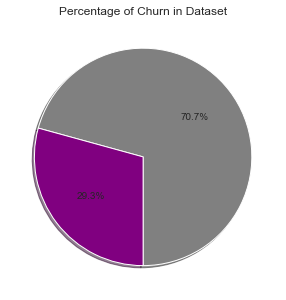

In [63]:
# Data to plot
sizes = full_data['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes,colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,) #explode=explode,labels=labels, 
plt.title('Percentage of Churn in Dataset')
plt.show()

In detail we have a look at the target feature, the actual “Churn”. Therefore we plot it accordingly and see that 29.3% Of the total amount of customer churn. This is important to know so we have the same proportion of Churned Customers to Non-Churned Customers in our training data.

In [64]:
#reviewing the no of records in the target field - Churn
full_data['Churn'].value_counts()

0    13074
1     5410
Name: Churn, dtype: int64

In [65]:
full_data.isnull().sum()

CustomerKey                     0
SalesAmount_sum                 0
SalesAmount_max                 0
SalesAmount_min                 0
SalesAmount_mean                0
SalesAmount_median              0
OrderQuantity_sum               0
OrderQuantity_max               0
OrderQuantity_min               0
OrderQuantity_mean              0
OrderQuantity_median            0
OrderDate_max                   0
diff_sum                        0
diff_max                        0
diff_min                        0
diff_mean                       0
diff_median                     0
BirthDate                       0
MaritalStatus                   0
Gender                          0
YearlyIncome                    0
TotalChildren                   0
NumberChildrenAtHome            0
EnglishEducation                0
EnglishOccupation               0
HouseOwnerFlag                  0
NumberCarsOwned                 0
DateFirstPurchase               0
CommuteDistance                 0
Manufacturer  

### 2.2 Encoding <a id='section_id6'></a>

In [66]:
#separate variables into numerical and categorical data
#numeric data
numeric = full_data.select_dtypes(include=[np.number])

#categorical data
cat = full_data.select_dtypes(exclude=[np.number])

print("There are {} numeric and {} categorical columns in the donor data".
     format(numeric.shape[1],cat.shape[1]))

There are 30 numeric and 11 categorical columns in the donor data


In [67]:
# below columns are categorical columns
categorical = full_data[full_data.columns[full_data.dtypes==object]]
categorical.describe()

,BirthDate,MaritalStatus,Gender,EnglishEducation,EnglishOccupation,HouseOwnerFlag,CommuteDistance
count,18484,18484,18484,18484,18484,18484,18484
unique,6139,2,2,5,5,2,5
top,1980-10-14,M,M,Bachelors,Professional,1,0-1 Miles
freq,18,10011,9351,5356,5520,12502,6310


In [68]:
#dummfy all categorical variables
#final_data.dtypes
final_data = pd.get_dummies(full_data, columns=['MaritalStatus','Gender','EnglishEducation','EnglishOccupation','HouseOwnerFlag','CommuteDistance'], drop_first = False)

In [69]:
final_data.columns

Index(['CustomerKey', 'SalesAmount_sum', 'SalesAmount_max', 'SalesAmount_min',
       'SalesAmount_mean', 'SalesAmount_median', 'OrderQuantity_sum',
       'OrderQuantity_max', 'OrderQuantity_min', 'OrderQuantity_mean',
       'OrderQuantity_median', 'OrderDate_max', 'diff_sum', 'diff_max',
       'diff_min', 'diff_mean', 'diff_median', 'BirthDate', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned',
       'DateFirstPurchase', 'Manufacturer', 'On Promotion', 'Other', 'Price',
       'Quality', 'Review', 'Television  Advertisement', 'Tenure', 'Age',
       'Last_purchase_date', 'Cuttoff_date', 'Churn', 'MaritalStatus_M',
       'MaritalStatus_S', 'Gender_F', 'Gender_M', 'EnglishEducation_Bachelors',
       'EnglishEducation_Graduate Degree', 'EnglishEducation_High School',
       'EnglishEducation_Partial College',
       'EnglishEducation_Partial High School', 'EnglishOccupation_Clerical',
       'EnglishOccupation_Management', 'EnglishOccupation_Manual'

In [70]:
final_data.sample()

,CustomerKey,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,...,EnglishOccupation_Manual,EnglishOccupation_Professional,EnglishOccupation_Skilled Manual,HouseOwnerFlag_0,HouseOwnerFlag_1,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
659,11659,235.01,78.98,21.49,47.002,37.29,10,3,1,2.0,...,0,1,0,0,1,0,0,0,1,0


In [71]:
final_data.isnull().sum()

CustomerKey                                0
SalesAmount_sum                            0
SalesAmount_max                            0
SalesAmount_min                            0
SalesAmount_mean                           0
SalesAmount_median                         0
OrderQuantity_sum                          0
OrderQuantity_max                          0
OrderQuantity_min                          0
OrderQuantity_mean                         0
OrderQuantity_median                       0
OrderDate_max                              0
diff_sum                                   0
diff_max                                   0
diff_min                                   0
diff_mean                                  0
diff_median                                0
BirthDate                                  0
YearlyIncome                               0
TotalChildren                              0
NumberChildrenAtHome                       0
NumberCarsOwned                            0
DateFirstP

### 2.3 Data Visualisation <a id='section_id7'></a>

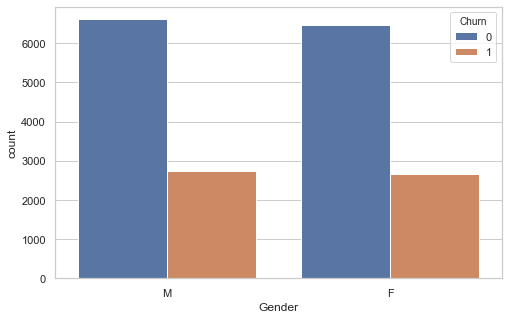

In [242]:
sns.countplot(x="Gender",hue="Churn",data=full_data)

In [73]:
#Gender breakdown for the churn rate
full_data.groupby('Gender').Churn.mean()

Gender
F    0.292018
M    0.293338
Name: Churn, dtype: float64

Male customers are more likely to churn vs. Female customers, but the difference is minimal (~0.013%).

Let’s replicate this for all categorical columns. To not repeat what we did for gender, you can find the code needed for all below: Now we go over the features which show the most significant difference across their values:

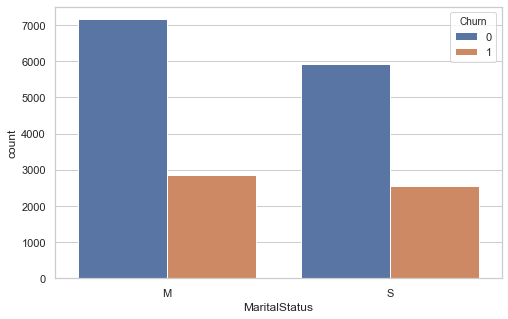

In [243]:
sns.countplot(x="MaritalStatus",hue="Churn",data=full_data)

In [75]:
#Maritalstatus breakdown for the churn rate
full_data.groupby('MaritalStatus').Churn.mean()

MaritalStatus
M    0.285686
S    0.300956
Name: Churn, dtype: float64

Single customers are more likely to churn vs. Married customers, but the difference is minimal (~0.02%).

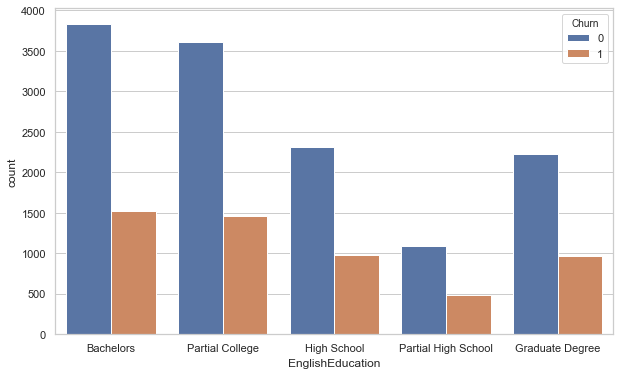

In [244]:
plt.rc("font", size=24)
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(x="EnglishEducation",hue="Churn",data=full_data)

In [77]:
#Maritalstatus breakdown for the churn rate
full_data.groupby('EnglishEducation').Churn.mean()

EnglishEducation
Bachelors              0.283420
Graduate Degree        0.302916
High School            0.297511
Partial College        0.287520
Partial High School    0.309930
Name: Churn, dtype: float64

In [245]:
#Maritalstatus breakdown for the churn rate
full_data.groupby('EnglishEducation').Churn.mean()

EnglishEducation
Bachelors             0.28
Graduate Degree       0.30
High School           0.30
Partial College       0.29
Partial High School   0.31
Name: Churn, dtype: float64

Partial High School customers are more likely to churn vs. all others.

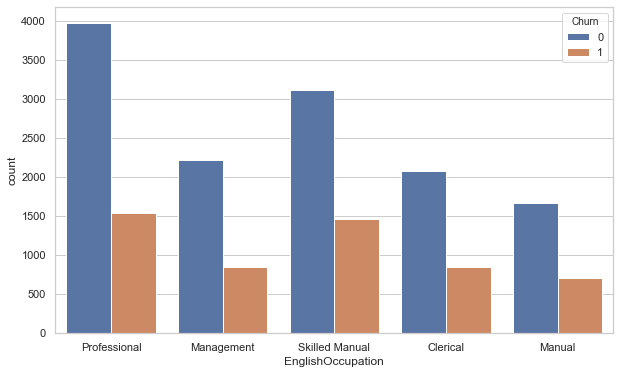

In [246]:
sns.countplot(x="EnglishOccupation",hue="Churn",data=full_data)

In [79]:
#Maritalstatus breakdown for the churn rate
full_data.groupby('EnglishOccupation').Churn.mean()

EnglishOccupation
Clerical          0.290642
Management        0.277398
Manual            0.297819
Professional      0.278623
Skilled Manual    0.318549
Name: Churn, dtype: float64

English Occupation customers are more likely to churn vs. Others customers.

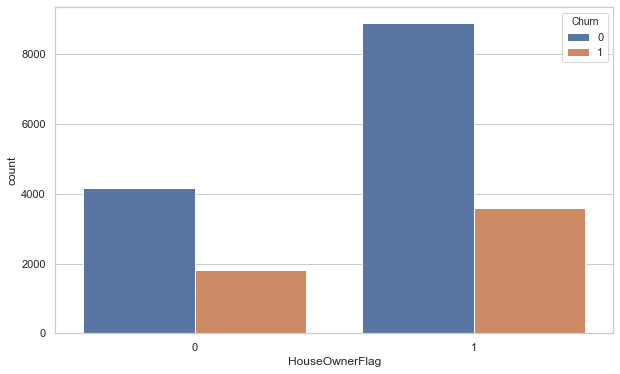

In [247]:
sns.countplot(x="HouseOwnerFlag",hue="Churn",data=full_data)

In [81]:
#Maritalstatus breakdown for the churn rate
full_data.groupby('HouseOwnerFlag').Churn.mean()

HouseOwnerFlag
0    0.302742
1    0.287874
Name: Churn, dtype: float64

No HouseOwnerFlag customers are more likely to churn vs. Married customers, but the difference is minimal (~0.02%).

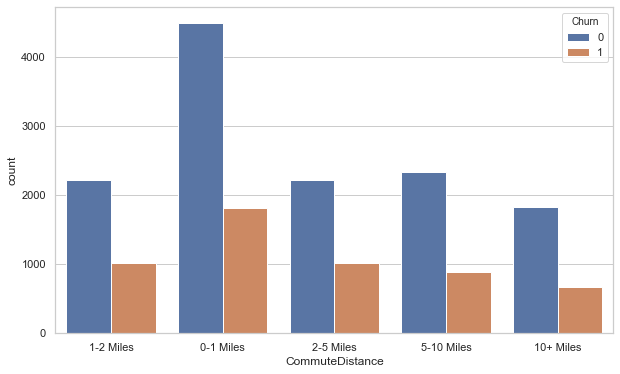

In [248]:
sns.countplot(x="CommuteDistance",hue="Churn",data=full_data)

In [83]:
#Maritalstatus breakdown for the churn rate
full_data.groupby('CommuteDistance').Churn.mean()

CommuteDistance
0-1 Miles     0.288114
1-2 Miles     0.313119
10+ Miles     0.269848
2-5 Miles     0.315090
5-10 Miles    0.276291
Name: Churn, dtype: float64

2-5 Miles customers are more likely to churn vs. others distance customers.

###### We are done with the categorical features. Let’s see how numerical features look like:

In [84]:
numeric.columns

Index(['CustomerKey', 'SalesAmount_sum', 'SalesAmount_max', 'SalesAmount_min',
       'SalesAmount_mean', 'SalesAmount_median', 'OrderQuantity_sum',
       'OrderQuantity_max', 'OrderQuantity_min', 'OrderQuantity_mean',
       'OrderQuantity_median', 'diff_sum', 'diff_max', 'diff_min', 'diff_mean',
       'diff_median', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'NumberCarsOwned', 'Manufacturer', 'On Promotion', 'Other', 'Price',
       'Quality', 'Review', 'Television  Advertisement', 'Tenure', 'Age',
       'Churn'],
      dtype='object')

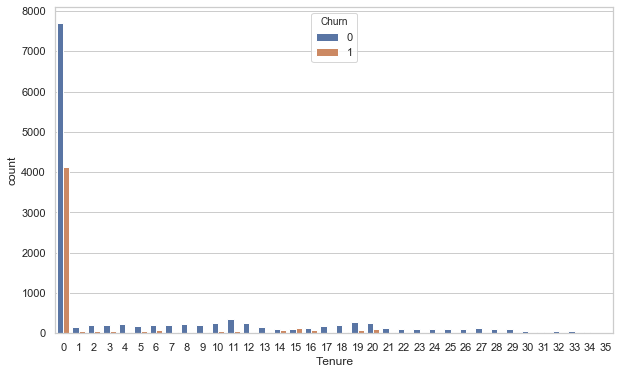

In [249]:
sns.countplot(x="Tenure",hue="Churn",data=full_data)

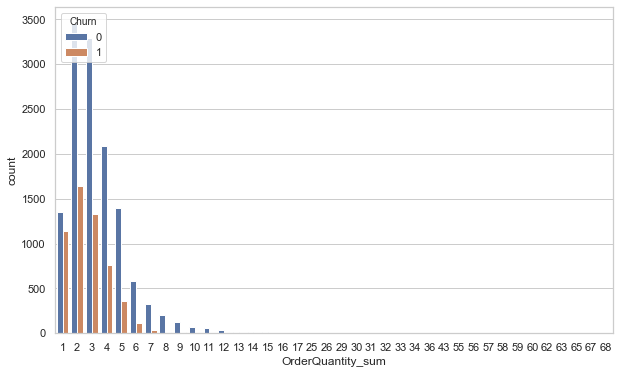

In [250]:
sns.countplot(x="OrderQuantity_sum",hue="Churn",data=full_data)

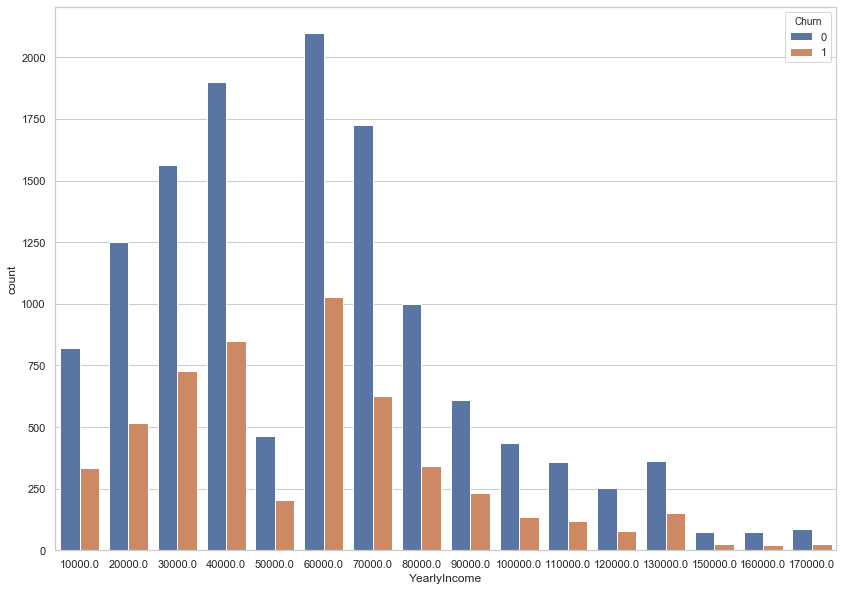

In [251]:
plt.rc("font", size=24)
plt.rcParams['figure.figsize'] = (14, 10)
sns.countplot(x="YearlyIncome",hue="Churn",data=full_data)

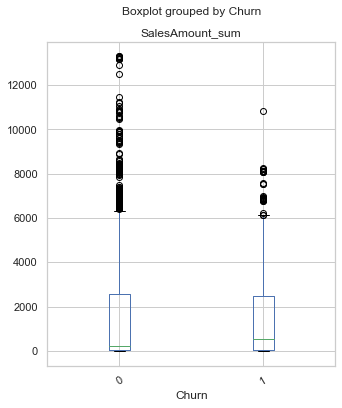

In [89]:
#check outlaire for SalesAmount_sum with churn
full_data.boxplot('SalesAmount_sum','Churn',rot = 30,figsize=(5,6))

Text(0, 0.5, 'Frequency')

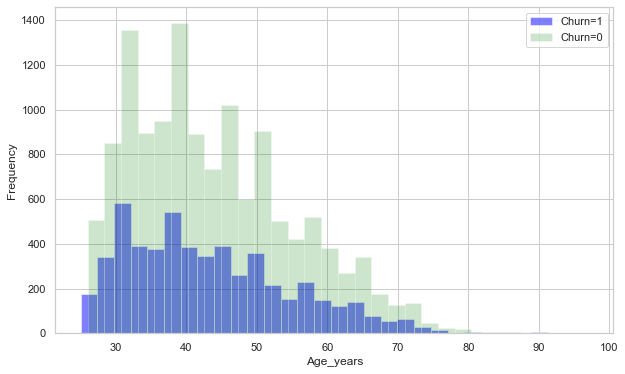

In [90]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
full_data[full_data['Churn']==1]['Age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Churn=1')
full_data[full_data['Churn']==0]['Age'].hist(alpha=0.2,color='green',
                                              bins=30,label='Churn=0')
plt.legend()
plt.xlabel('Age_years')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

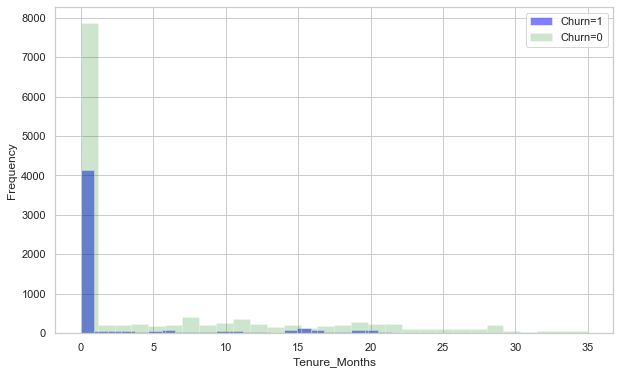

In [91]:
#Investigating Churn versus Tenure Months.
plt.figure(figsize=(10,6))
full_data[full_data['Churn']==1]['Tenure'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Churn=1')
full_data[full_data['Churn']==0]['Tenure'].hist(alpha=0.2,color='green',
                                              bins=30,label='Churn=0')
plt.legend()
plt.xlabel('Tenure_Months')
plt.ylabel('Frequency')

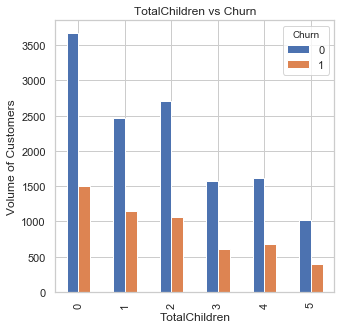

In [92]:
pd.crosstab(full_data.TotalChildren,full_data.Churn).plot(kind='bar')
plt.title('TotalChildren vs Churn')
plt.xlabel('TotalChildren')
plt.ylabel('Volume of Customers')
plt.savefig('pur_fre_pout_bar')

No of children does not seem to be a good predictor of the outcome variable.


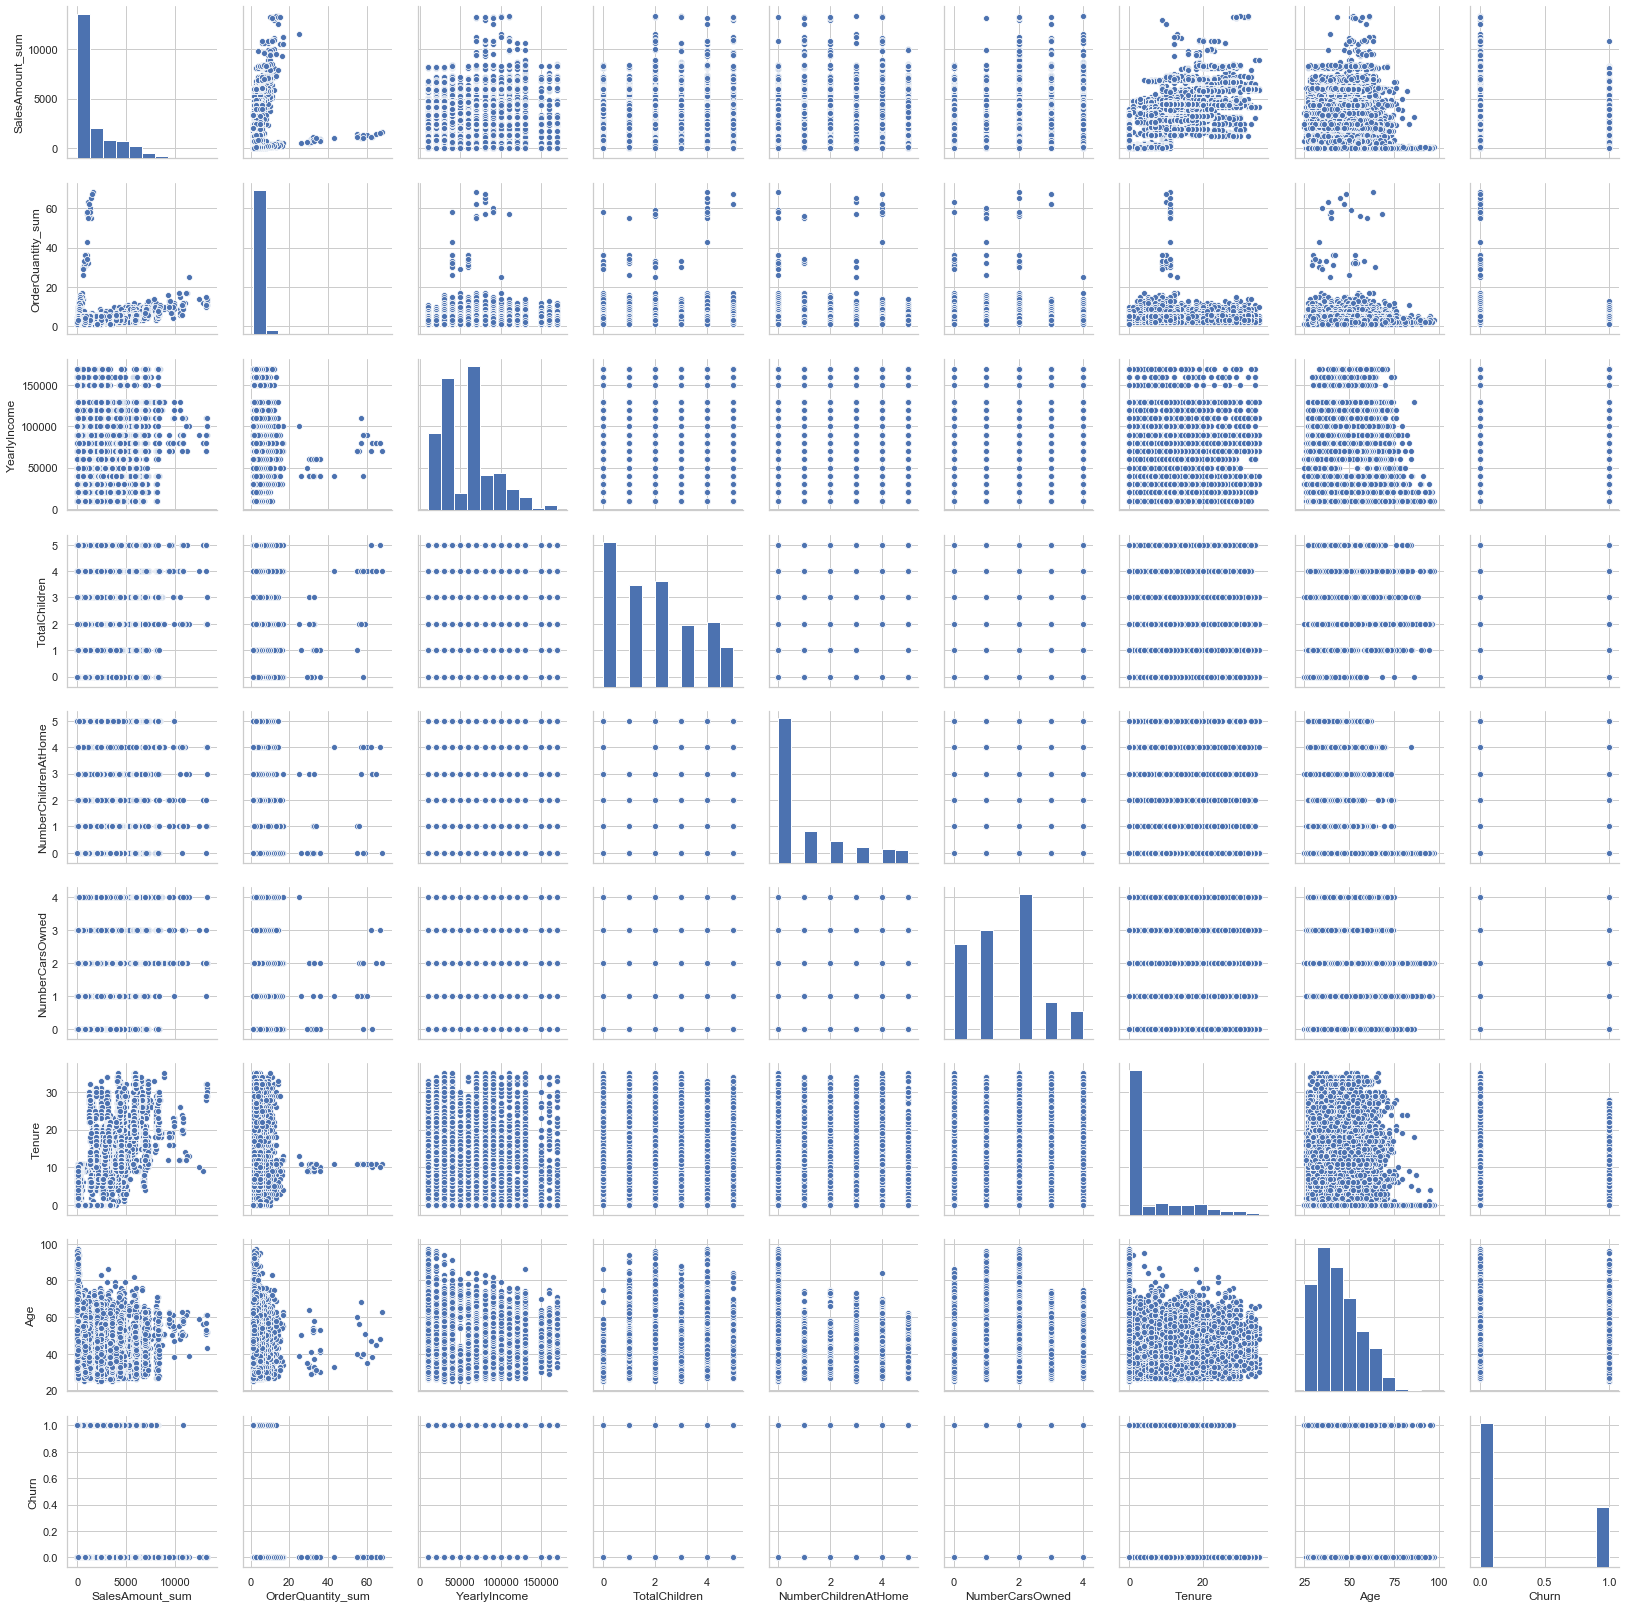

In [93]:
x = final_data[['SalesAmount_sum', 'OrderQuantity_sum', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'Tenure', 'Age', 'Churn']]
sns.pairplot(x)

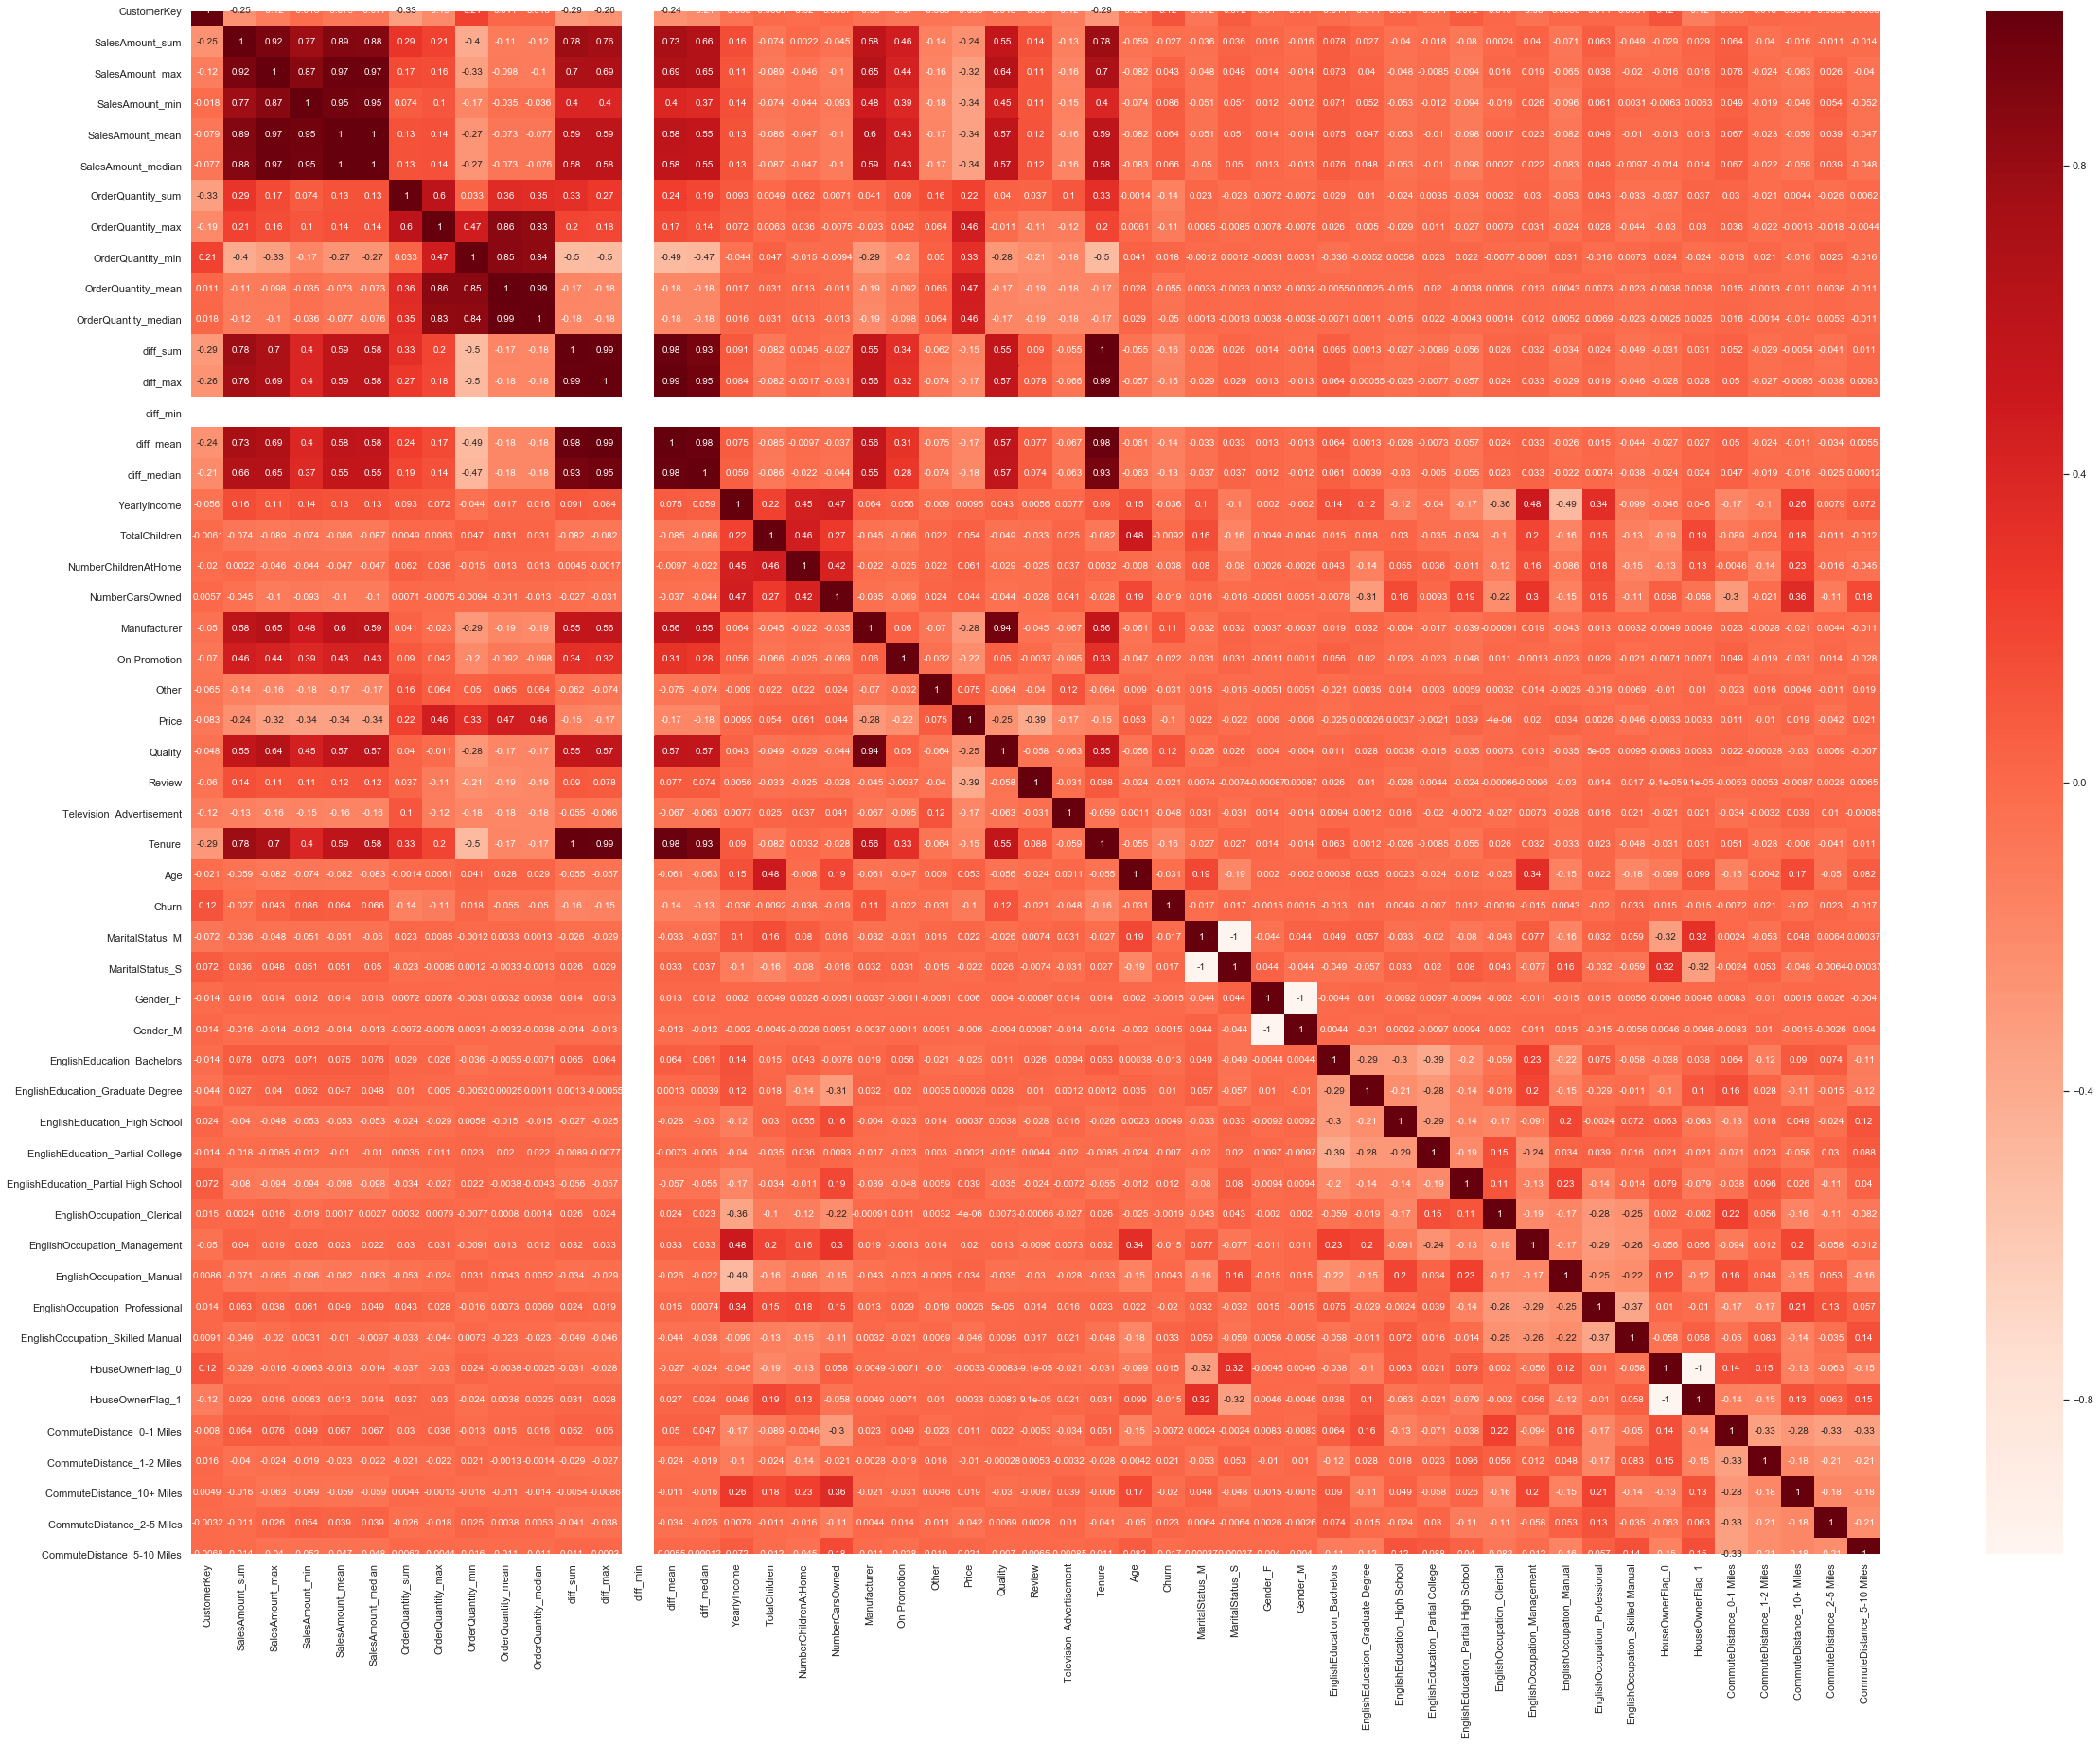

In [94]:
plt.figure(figsize=(40,30))
#%matplotlib inline
corr = final_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap=plt.cm.Reds)

In [95]:
#sorting by top realtion
final_data.corr()["Churn"].sort_values(ascending=False)

Churn                                   1.000000
Quality                                 0.121344
CustomerKey                             0.120240
Manufacturer                            0.110062
SalesAmount_min                         0.085604
SalesAmount_median                      0.065696
SalesAmount_mean                        0.064314
SalesAmount_max                         0.043118
EnglishOccupation_Skilled Manual        0.032611
CommuteDistance_2-5 Miles               0.022675
CommuteDistance_1-2 Miles               0.020673
OrderQuantity_min                       0.018243
MaritalStatus_S                         0.016722
HouseOwnerFlag_0                        0.015288
EnglishEducation_Partial High School    0.011591
EnglishEducation_Graduate Degree        0.010267
EnglishEducation_High School            0.004938
EnglishOccupation_Manual                0.004341
Gender_M                                0.001450
Gender_F                               -0.001450
EnglishOccupation_Cl

In [96]:
#reviewing the no of records in the target field - Churn
final_data['Churn'].value_counts()

0    13074
1     5410
Name: Churn, dtype: int64

In [97]:
#Keep an hold out sample for scoring and deployment. 
#extract only churners
Churners = final_data.loc[final_data['Churn'] == 1] 
#Extract only first 6973 rows from Non churners
non_churners = final_data.loc[final_data['Churn'] == 0]
#Score_data = final_data.loc[final_data['Churn'] == 0].tail(6000)

In [98]:
#Counting Churners
Churners['Churn'].value_counts()

1    5410
Name: Churn, dtype: int64

In [99]:
#Counting non churners
non_churners['Churn'].value_counts()

0    13074
Name: Churn, dtype: int64

### 2.4 Creating hold out sample for final model Testing <a id='section_id8'></a>

### Randomly seperate the 13074 Non-Churners into 2 groups:
#### 50% - Non_churners - for training, validating, and testing the model
#### 50% - Score_data - for scoring the model
#### Used the train_test_split functions to achieve random selection of the data
##### This is not for model purposes or data partitioning, its only to split the data and select a hold out sample

In [100]:
Score_data,Non_churners = train_test_split(non_churners,test_size=0.5,random_state=42)

In [101]:
Non_churners.shape

(6537, 56)

#### Score_data This is my hold out sample for scoring/deployment

In [102]:
#Churners.describe()
#Non_churners.describe()
Score_data.shape

(6537, 56)

In [103]:
Score_data.head()

,CustomerKey,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,...,EnglishOccupation_Manual,EnglishOccupation_Professional,EnglishOccupation_Skilled Manual,HouseOwnerFlag_0,HouseOwnerFlag_1,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
12982,23982,548.98,548.98,548.98,548.980,548.980,2,2,2,2.0,...,1,0,0,1,0,1,0,0,0,0
10010,21010,4.99,4.99,4.99,4.990,4.990,1,1,1,1.0,...,1,0,0,0,1,0,1,0,0,0
313,11313,44.57,42.28,2.29,22.285,22.285,4,3,1,2.0,...,0,0,0,0,1,0,0,0,0,1
9534,20534,23.97,23.97,23.97,23.970,23.970,3,3,3,3.0,...,0,1,0,0,1,0,0,0,1,0
11535,22535,1750.98,1750.98,1750.98,1750.980,1750.980,2,2,2,2.0,...,0,0,1,0,1,0,1,0,0,0


In [104]:
#Append Churners and non churners excluding the hold out sample for scoring
model_data = pd.concat([Churners, Non_churners],ignore_index=True)
model_data.head()

,CustomerKey,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,...,EnglishOccupation_Manual,EnglishOccupation_Professional,EnglishOccupation_Skilled Manual,HouseOwnerFlag_0,HouseOwnerFlag_1,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
0,11000,8248.99,3399.99,2341.97,2749.663333,2507.03,8,5,1,2.666667,...,0,1,0,0,1,0,1,0,0,0
1,11002,8114.04,3399.99,2294.99,2704.680000,2419.06,4,2,1,1.333333,...,0,1,0,0,1,0,0,0,1,0
2,11003,8139.29,3399.99,2318.96,2713.096667,2420.34,9,4,1,3.000000,...,0,1,0,1,0,0,0,0,0,1
3,11004,8196.01,3399.99,2376.96,2732.003333,2419.06,6,3,1,2.000000,...,0,1,0,0,1,0,1,0,0,0
4,11005,8121.33,3374.99,2362.27,2707.110000,2384.07,6,4,1,2.000000,...,0,1,0,0,1,0,0,0,0,1


In [105]:
model_data.groupby('Churn').size()

Churn
0    6537
1    5410
dtype: int64

In [106]:
#measures of central tendencies - investigating the difference between the averages of independent variables vs the target variables
model_data.groupby('Churn').mean()

,CustomerKey,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,...,EnglishOccupation_Manual,EnglishOccupation_Professional,EnglishOccupation_Skilled Manual,HouseOwnerFlag_0,HouseOwnerFlag_1,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
Churn,,,,,,,,,,,,,,,,,,,,,
0,19781.206364,1609.738203,1020.831017,702.196639,859.863503,857.173630,3.506043,2.639437,1.901178,2.264014,...,0.127581,0.296007,0.246596,0.320636,0.679364,0.342665,0.170873,0.136913,0.169497,0.180052
1,21238.877819,1500.307896,1144.664849,886.044090,1015.922580,1017.157502,2.678189,2.370425,1.941220,2.156069,...,0.131238,0.284288,0.269501,0.334750,0.665250,0.336044,0.187061,0.124399,0.188355,0.164140


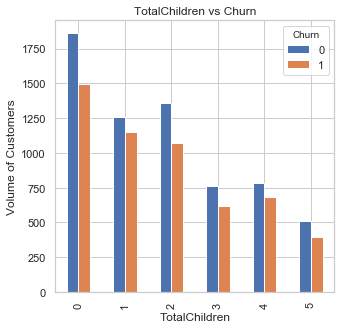

In [107]:
#No of children does not seem to be a good predictor of the outcome variable.
pd.crosstab(model_data.TotalChildren,model_data.Churn).plot(kind='bar')
plt.title('TotalChildren vs Churn')
plt.xlabel('TotalChildren')
plt.ylabel('Volume of Customers')
plt.savefig('pur_fre_pout_bar')

Text(0, 0.5, 'Frequency')

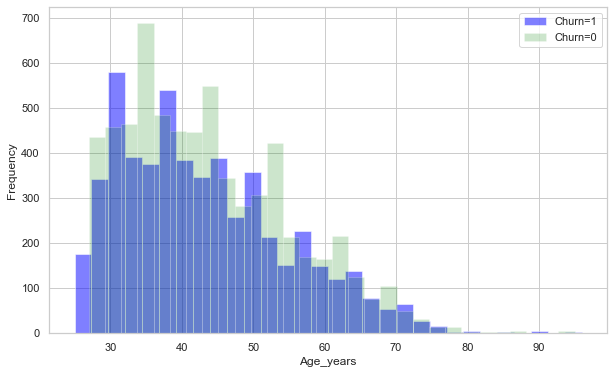

In [108]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
model_data[model_data['Churn']==1]['Age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Churn=1')
model_data[model_data['Churn']==0]['Age'].hist(alpha=0.2,color='green',
                                              bins=30,label='Churn=0')
plt.legend()
plt.xlabel('Age_years')
plt.ylabel('Frequency')

In [109]:
model_data.isnull().sum()

CustomerKey                               0
SalesAmount_sum                           0
SalesAmount_max                           0
SalesAmount_min                           0
SalesAmount_mean                          0
SalesAmount_median                        0
OrderQuantity_sum                         0
OrderQuantity_max                         0
OrderQuantity_min                         0
OrderQuantity_mean                        0
OrderQuantity_median                      0
OrderDate_max                             0
diff_sum                                  0
diff_max                                  0
diff_min                                  0
diff_mean                                 0
diff_median                               0
BirthDate                                 0
YearlyIncome                              0
TotalChildren                             0
NumberChildrenAtHome                      0
NumberCarsOwned                           0
DateFirstPurchase               

In [110]:
#replace missing values with most frequent values
model_data = model_data.fillna(model_data.mode().iloc[0])

In [111]:
model_data.isnull().sum()

CustomerKey                             0
SalesAmount_sum                         0
SalesAmount_max                         0
SalesAmount_min                         0
SalesAmount_mean                        0
SalesAmount_median                      0
OrderQuantity_sum                       0
OrderQuantity_max                       0
OrderQuantity_min                       0
OrderQuantity_mean                      0
OrderQuantity_median                    0
OrderDate_max                           0
diff_sum                                0
diff_max                                0
diff_min                                0
diff_mean                               0
diff_median                             0
BirthDate                               0
YearlyIncome                            0
TotalChildren                           0
NumberChildrenAtHome                    0
NumberCarsOwned                         0
DateFirstPurchase                       0
Manufacturer                      

In [112]:
#Carry out a statistical test to understand key statistical elements
model_data.describe()

,CustomerKey,SalesAmount_sum,SalesAmount_max,SalesAmount_min,SalesAmount_mean,SalesAmount_median,OrderQuantity_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_mean,...,EnglishOccupation_Manual,EnglishOccupation_Professional,EnglishOccupation_Skilled Manual,HouseOwnerFlag_0,HouseOwnerFlag_1,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
count,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,...,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000,11947.000000
mean,20441.288608,1560.184511,1076.907106,785.448896,930.532257,929.619662,3.131163,2.517619,1.919310,2.215133,...,0.129237,0.290701,0.256968,0.327028,0.672972,0.339667,0.178204,0.131246,0.178036,0.172847
std,5358.662733,2076.734239,1257.571309,955.260614,1068.569755,1068.021119,2.430887,1.108580,1.045356,0.934419,...,0.335477,0.454105,0.436980,0.469147,0.469147,0.473616,0.382700,0.337684,0.382559,0.378131
min,11000.000000,2.290000,2.290000,2.290000,2.290000,2.290000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15872.500000,48.970000,42.280000,37.970000,39.980000,39.980000,2.000000,2.000000,1.000000,1.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20509.000000,248.010000,166.950000,154.980000,156.270000,156.590000,3.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25061.500000,2483.980000,2319.990000,1249.840000,1886.204800,1968.271250,4.000000,3.000000,3.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,29483.000000,13294.270000,3578.270000,3578.270000,3578.270000,3578.270000,65.000000,8.000000,8.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
#model_data=model_data.drop('BirthDate',axis=1)

In [114]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11947 entries, 0 to 11946
Data columns (total 56 columns):
CustomerKey                             11947 non-null int64
SalesAmount_sum                         11947 non-null float64
SalesAmount_max                         11947 non-null float64
SalesAmount_min                         11947 non-null float64
SalesAmount_mean                        11947 non-null float64
SalesAmount_median                      11947 non-null float64
OrderQuantity_sum                       11947 non-null int64
OrderQuantity_max                       11947 non-null int64
OrderQuantity_min                       11947 non-null int64
OrderQuantity_mean                      11947 non-null float64
OrderQuantity_median                    11947 non-null float64
OrderDate_max                           11947 non-null datetime64[ns]
diff_sum                                11947 non-null int32
diff_max                                11947 non-null int32
diff_min      

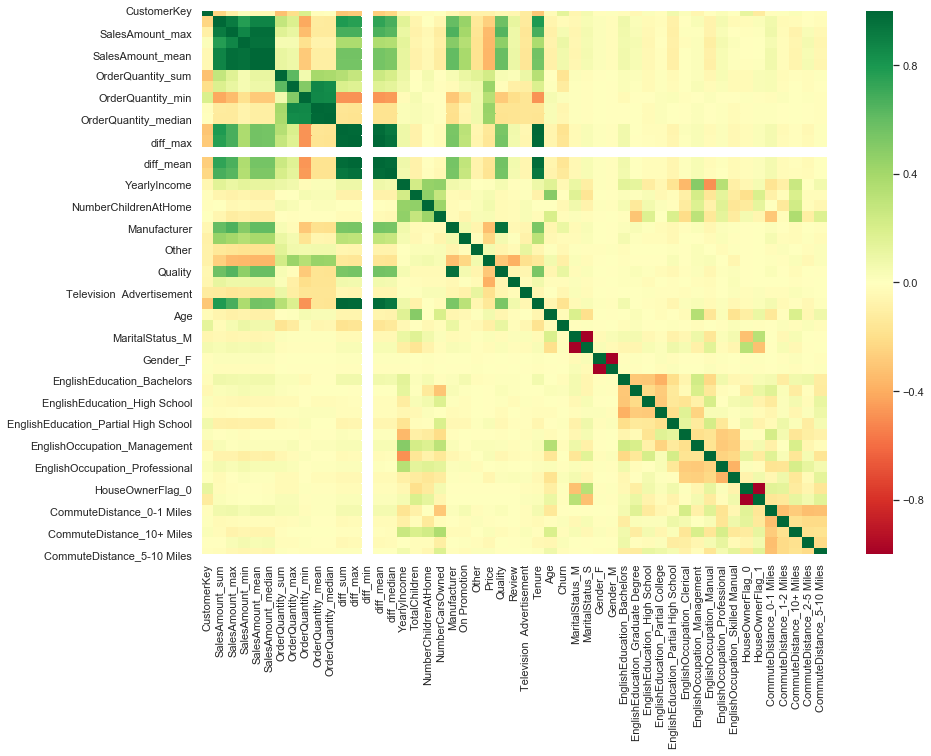

In [115]:
#correlation plot
plt.figure(figsize=(14,10))
corr = model_data.corr()
sns.heatmap(corr, cmap='RdYlGn')

In [116]:
print (corr['Churn'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Churn'].sort_values(ascending=False)[-5:]) #last 5 values

Churn                               1.000000
CustomerKey                         0.135410
Quality                             0.114608
Manufacturer                        0.104428
SalesAmount_min                     0.095804
SalesAmount_median                  0.074566
SalesAmount_mean                    0.072700
SalesAmount_max                     0.049018
EnglishOccupation_Skilled Manual    0.026092
CommuteDistance_2-5 Miles           0.024539
EnglishEducation_Graduate Degree    0.022381
CommuteDistance_1-2 Miles           0.021056
OrderQuantity_min                   0.019068
HouseOwnerFlag_0                    0.014976
MaritalStatus_S                     0.014845
Name: Churn, dtype: float64 

----------------------
diff_max            -0.163796
OrderQuantity_sum   -0.169526
Tenure              -0.177421
diff_sum            -0.178826
diff_min                  NaN
Name: Churn, dtype: float64


# 3. Feature Selection <a id='section_id9'></a>

#### Variable Selection using Python - Vote based approach

In [117]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

#4.-Variable-Selection-using-Python---Vote-based-approach
# Encoding the categorical variable
fit = model_data.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    model_data[i] = d[i].transform(model_data[i].fillna('NA'))

In [118]:
#Select features and target
#df['Churn'] = df['Churn'].apply(lambda x : 1 if x == 'yes' else 0)  # Convert to numeric
#Target = model_data.Churn
#df = model_data.drop('Churn',axis=1)
#Select features and target
features = model_data[model_data.columns.difference(['Churn','CustomerKey','OrderDate_max','SalesAmount_max', 'SalesAmount_min','SalesAmount_mean', 'SalesAmount_median','OrderQuantity_min','OrderQuantity_max', 'OrderQuantity_mean', 'OrderQuantity_median','Cuttoff_date','Last_purchase_date','DateFirstPurchase','BirthDate'])]
labels = model_data['Churn']

### 4.1 WOE and IV

In [119]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [120]:
final_iv, IV = data_vars(model_data[model_data.columns.difference(['Churn','CustomerKey','OrderDate_max','SalesAmount_max', 'SalesAmount_min','SalesAmount_mean', 'SalesAmount_median','OrderQuantity_min','OrderQuantity_max', 'OrderQuantity_mean', 'OrderQuantity_median','Cuttoff_date','Last_purchase_date','DateFirstPurchase','BirthDate'])],model_data.Churn)


In [121]:
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,25.0,37.0,4346,2046,0.470778,2300,0.529222,0.378189,0.351843,0.072207,0.003008
1,Age,38.0,47.0,3642,1616,0.443712,2026,0.556288,0.298706,0.309928,-0.036880,0.003008
2,Age,48.0,96.0,3959,1748,0.441526,2211,0.558474,0.323105,0.338229,-0.045743,0.003008
3,CommuteDistance_0-1 Miles,0.0,0.0,7889,3592,0.455318,4297,0.544682,0.663956,0.657335,0.010021,0.000196
4,CommuteDistance_0-1 Miles,1.0,1.0,4058,1818,0.448004,2240,0.551996,0.336044,0.342665,-0.019510,0.000196


In [122]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
26,OrderQuantity_sum,0.142548
33,Tenure,0.142208
37,diff_mean,0.140106
38,diff_median,0.139821
40,diff_sum,0.139748
36,diff_max,0.139748
29,Quality,0.053439
20,Manufacturer,0.044126
28,Price,0.038282
32,Television Advertisement,0.012032


### 4.2 Variable Importance using Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(features,labels)

pred = rf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred,labels)
print(accuracy)

0.9812505231438855


In [124]:
from pandas import DataFrame
VI = DataFrame(rf.feature_importances_, columns = ["RF"], index=features.columns)

In [125]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0).head(20)

,index,RF
31,SalesAmount_sum,0.192096
0,Age,0.126897
35,YearlyIncome,0.063224
26,OrderQuantity_sum,0.058682
40,diff_sum,0.047298
34,TotalChildren,0.039200
38,diff_median,0.038018
37,diff_mean,0.036072
23,NumberCarsOwned,0.032661
36,diff_max,0.029776


### 4.3 Recursive Feature Elimination

In [126]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

In [127]:
# put into data frame
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [128]:
Selected[Selected['RFE'] == True].head(20)

,index,RFE
1,CommuteDistance_0-1 Miles,True
2,CommuteDistance_1-2 Miles,True
4,CommuteDistance_2-5 Miles,True
6,EnglishEducation_Bachelors,True
7,EnglishEducation_Graduate Degree,True
9,EnglishEducation_Partial College,True
16,Gender_F,True
17,Gender_M,True
18,HouseOwnerFlag_0,True
19,HouseOwnerFlag_1,True


### 4.4 Variable Importance using Extratrees Classifier

In [129]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.12985487 0.0143082  0.01165499 0.00799566 0.01212977 0.0093976
 0.00893571 0.00725725 0.00864432 0.01022156 0.00500943 0.00896556
 0.00689517 0.00615199 0.00913816 0.01064563 0.01814711 0.01725264
 0.01059149 0.01113099 0.0179306  0.01447967 0.01386778 0.03873268
 0.02830952 0.01467705 0.08015589 0.01250298 0.01157334 0.01581927
 0.00516114 0.17023148 0.00367577 0.02409906 0.04426888 0.05669994
 0.02874503 0.03251986 0.03048949 0.         0.03173249]


In [130]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [131]:
FI = FI.reset_index()
FI.sort_values(['Extratrees'],ascending=0).head(20)

,index,Extratrees
31,SalesAmount_sum,0.170231
0,Age,0.129855
26,OrderQuantity_sum,0.080156
35,YearlyIncome,0.056700
34,TotalChildren,0.044269
23,NumberCarsOwned,0.038733
37,diff_mean,0.032520
40,diff_sum,0.031732
38,diff_median,0.030489
36,diff_max,0.028745


### 4.5 Chi Square

In [132]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [133]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [134]:
chi_sq = chi_sq.reset_index()
chi_sq.sort_values('Chi_Square',ascending=0).head(20)

,index,Chi_Square
35,YearlyIncome,375433.71
40,diff_sum,163425.58
36,diff_max,133184.40
37,diff_mean,59524.43
38,diff_median,47320.68
31,SalesAmount_sum,22720.41
33,Tenure,5238.10
26,OrderQuantity_sum,647.92
29,Quality,141.94
20,Manufacturer,116.72


### 4.6 L1 feature selection

In [135]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

In [136]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()
l1[l1['L1'] == True].head(20)

,index,L1
0,Age,True
7,EnglishEducation_Graduate Degree,True
23,NumberCarsOwned,True
24,NumberChildrenAtHome,True
26,OrderQuantity_sum,True
29,Quality,True
31,SalesAmount_sum,True
32,Television Advertisement,True
33,Tenure,True
36,diff_max,True


### 4.7 LightGBM or XGBoost

In [137]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40,penalty="lgbmc", dual=False).fit(features, labels)
model = SelectFromModel(lgbmc,prefit=True)

In [138]:
from pandas import DataFrame
lgmc = DataFrame(model.get_support(), columns = ["LGBMC"], index=features.columns)
lgmc = lgmc.reset_index()
lgmc[lgmc['LGBMC'] == True].head(20)

,index,LGBMC
0,Age,True
24,NumberChildrenAtHome,True
26,OrderQuantity_sum,True
31,SalesAmount_sum,True
33,Tenure,True
34,TotalChildren,True
35,YearlyIncome,True
36,diff_max,True
37,diff_mean,True
38,diff_median,True


## 4.8 Combine all together

In [139]:
from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1,lgmc]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

## 4.9 Vote each variable

In [140]:
columns = ['IV', 'RF', 'Extratrees','Chi_Square','LGBMC']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(7,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)
#score_table['LGBMC'] = final_results['LGBMC'].astype(int)

In [141]:
score_table['final_score'] = score_table.sum(axis=1)
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Chi_Square,LGBMC,RFE,L1,final_score
26,OrderQuantity_sum,1,1,1,0,1,1,1,6
33,Tenure,1,0,0,1,1,1,1,5
31,SalesAmount_sum,0,1,1,1,1,0,1,5
0,Age,0,1,1,0,1,0,1,4
38,diff_median,1,1,0,1,0,0,1,4
37,diff_mean,1,0,1,1,0,0,1,4
35,YearlyIncome,0,1,1,1,1,0,0,4
40,diff_sum,1,1,0,1,0,0,1,4
36,diff_max,1,0,0,1,0,0,1,3
34,TotalChildren,0,1,1,0,1,0,0,3


## 4.10 Multicollinearity <a id='section_id10'></a>

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [143]:
features = features[list(score_table[score_table['final_score'] >= 2]['index'])]

In [144]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [145]:
list(vif['Features'])

['Age',
 'EnglishEducation_Graduate Degree',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'OrderQuantity_sum',
 'Quality',
 'SalesAmount_sum',
 'Television  Advertisement',
 'TotalChildren',
 'YearlyIncome',
 'diff_median']

In [146]:
features.describe()

,Age,EnglishEducation_Graduate Degree,NumberCarsOwned,NumberChildrenAtHome,OrderQuantity_sum,Quality,SalesAmount_sum,Television Advertisement,TotalChildren,YearlyIncome,diff_median
count,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00
mean,43.54,0.17,1.50,0.98,3.13,0.10,1560.18,0.03,1.83,56954.88,61.96
std,11.51,0.38,1.13,1.51,2.43,0.29,2076.73,0.18,1.61,32132.50,112.84
min,25.00,0.00,0.00,0.00,1.00,0.00,2.29,0.00,0.00,10000.00,0.00
25%,34.00,0.00,1.00,0.00,2.00,0.00,48.97,0.00,0.00,30000.00,0.00
50%,41.00,0.00,2.00,0.00,3.00,0.00,248.01,0.00,2.00,60000.00,0.00
75%,51.00,0.00,2.00,2.00,4.00,0.00,2483.98,0.00,3.00,70000.00,83.75
max,96.00,1.00,4.00,5.00,65.00,1.00,13294.27,1.00,5.00,170000.00,539.00


In [147]:
features.head(5)

,Age,EnglishEducation_Graduate Degree,NumberCarsOwned,NumberChildrenAtHome,OrderQuantity_sum,Quality,SalesAmount_sum,Television Advertisement,TotalChildren,YearlyIncome,diff_median
0,41,0,0,0,8,0.00,8248.99,0.00,2,90000.00,105.00
1,42,0,1,3,4,0.00,8114.04,0.00,3,60000.00,54.00
2,39,0,1,0,9,0.00,8139.29,0.00,0,70000.00,125.00
3,33,0,4,5,6,0.00,8196.01,0.00,5,80000.00,99.00
4,36,0,1,0,6,0.00,8121.33,0.00,0,70000.00,99.00


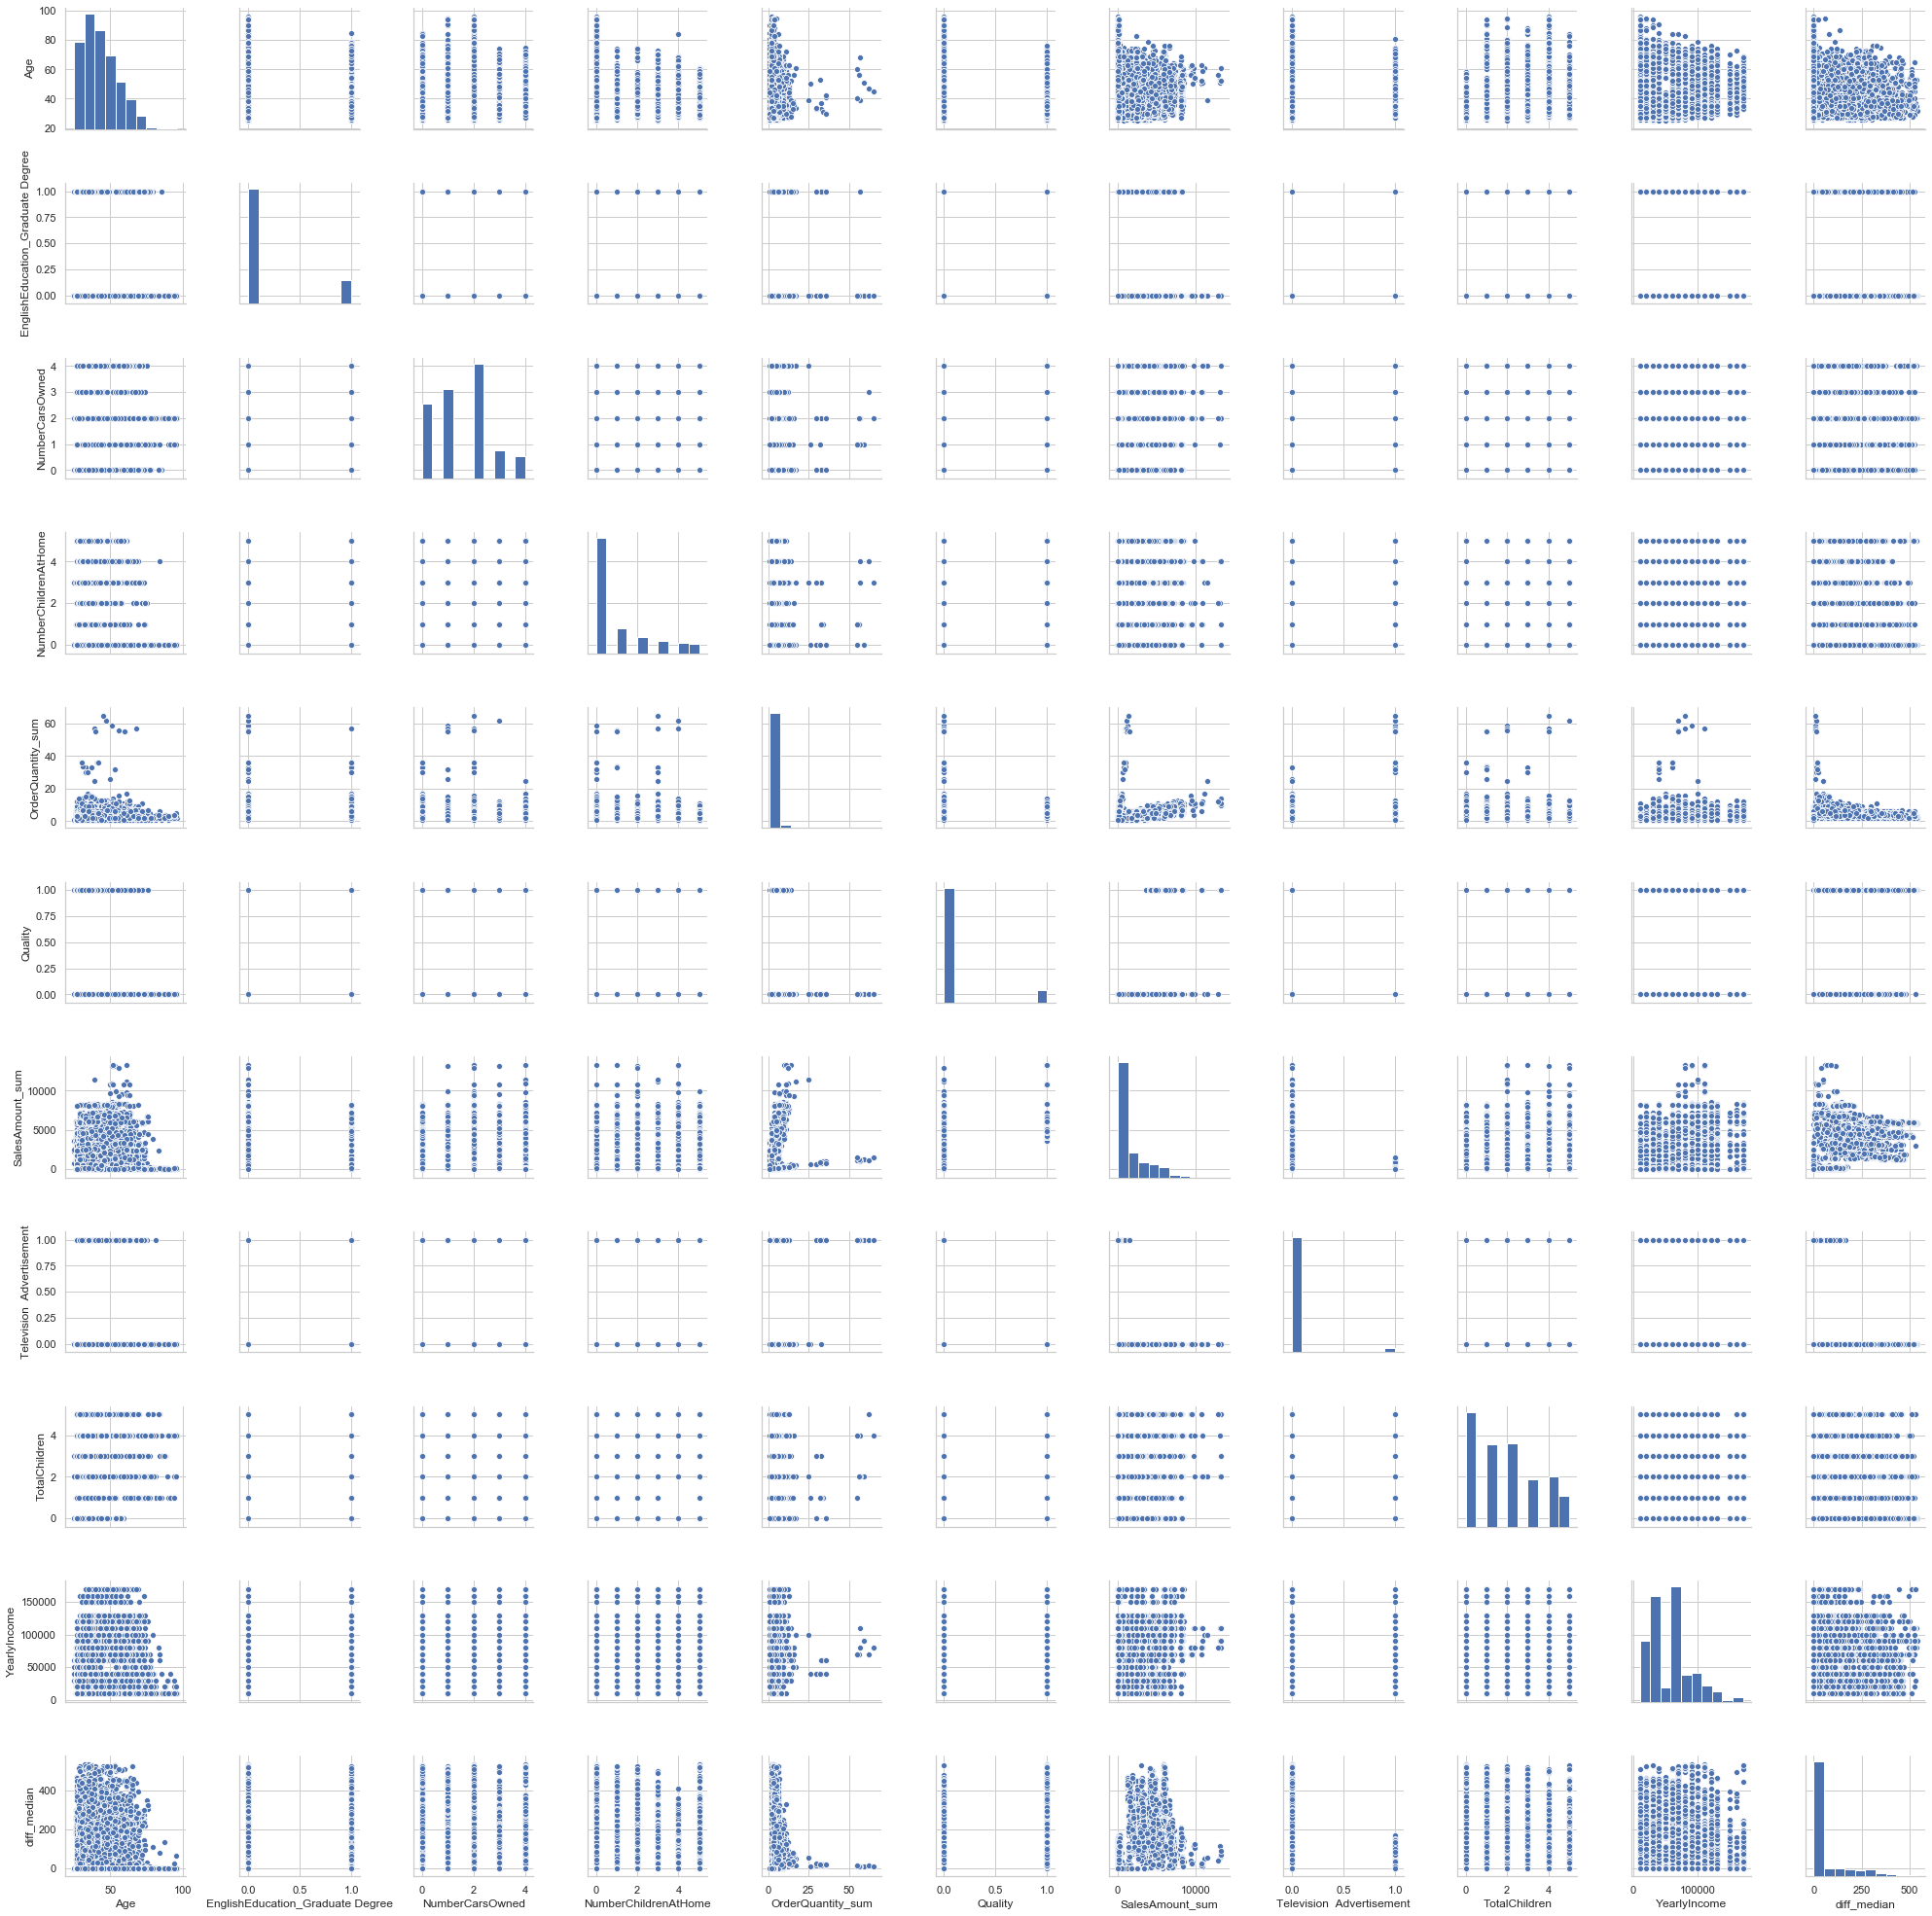

In [148]:
x = features  #final_data[['SalesAmount_sum', 'OrderQuantity_sum', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'Tenure', 'Age', 'Churn']]
sns.pairplot(x)

## 4.11 Descriptive Stats and Visualization - For selected variables <a id='section_id11'></a>

In [149]:
#Merge the best list to churn variable
final_vars = list(vif['Features']) + ['Churn']

In [150]:
df1 = model_data[final_vars].fillna(0)

In [151]:
df1.describe()

,Age,EnglishEducation_Graduate Degree,NumberCarsOwned,NumberChildrenAtHome,OrderQuantity_sum,Quality,SalesAmount_sum,Television Advertisement,TotalChildren,YearlyIncome,diff_median,Churn
count,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00,11947.00
mean,43.54,0.17,1.50,0.98,3.13,0.10,1560.18,0.03,1.83,56954.88,61.96,0.45
std,11.51,0.38,1.13,1.51,2.43,0.29,2076.73,0.18,1.61,32132.50,112.84,0.50
min,25.00,0.00,0.00,0.00,1.00,0.00,2.29,0.00,0.00,10000.00,0.00,0.00
25%,34.00,0.00,1.00,0.00,2.00,0.00,48.97,0.00,0.00,30000.00,0.00,0.00
50%,41.00,0.00,2.00,0.00,3.00,0.00,248.01,0.00,2.00,60000.00,0.00,0.00
75%,51.00,0.00,2.00,2.00,4.00,0.00,2483.98,0.00,3.00,70000.00,83.75,1.00
max,96.00,1.00,4.00,5.00,65.00,1.00,13294.27,1.00,5.00,170000.00,539.00,1.00


In [152]:
df1.shape

(11947, 12)

([<matplotlib.axis.XTick at 0x7dafc88>,
 <a list of 12 Text xticklabel objects>)

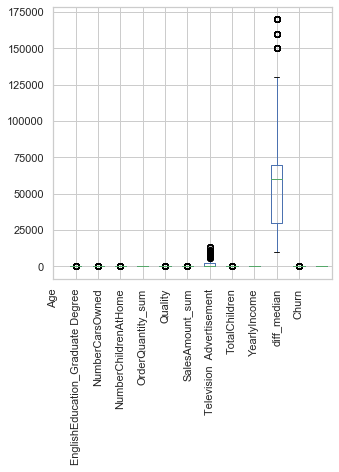

In [153]:
#ploting box plot to see Outliers
df1.plot.box()
plt.xticks(list(range(len(df1.columns))), df1.columns, rotation="vertical")

# 5. Validation <a id='section_id12'></a>

In [154]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size=0.20, random_state=0)

#train = train.reset_index(drop=True)
#test = test.reset_index(drop=True)

features_train = train[list(vif['Features'])] #X_train
label_train = train['Churn']                  #y_train
features_test = test[list(vif['Features'])]   #X_test
label_test = test['Churn']                    #y_test

In [155]:
all_features = pd.concat([features_train, features_test]) #X
all_labels = pd.concat([label_train, label_test])         #y

In [156]:
X = df1.drop('Churn',axis=1)
y= df1['Churn']

from sklearn.model_selection import train_test_split #importing libary
#spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

In [157]:
X.columns

Index(['Age', 'EnglishEducation_Graduate Degree', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'OrderQuantity_sum', 'Quality',
       'SalesAmount_sum', 'Television  Advertisement', 'TotalChildren',
       'YearlyIncome', 'diff_median'],
      dtype='object')

In [158]:
#implement cross validation, the cross_val_score method of the sklearn.model_selection library can be used. 
from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=300, random_state=42) 
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=classifier, X=features_train, y=label_train, cv=10)  
print(all_accuracies) 
#find the average of all the accuracies, simple use the mean() method of the object returned by cross_val_score
print(all_accuracies.mean()) 
#Finally let's find the standard deviation of the data to see degree of variance in the results obtained by our model. To do so, call the std() method on the all_accuracies object
print(all_accuracies.std()) 

[0.68096234 0.63702929 0.66736402 0.64330544 0.69142259 0.67573222
 0.66004184 0.67782427 0.67853403 0.66247379]
0.667468983433108
0.016261524263548485


### 5.1 Model cross validation <a id='section_id13'></a>

In [159]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Spot Check Algorithms: a list of the models we are going to use

models = []

models.append(('LR', LogisticRegression()))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('DT', DecisionTreeClassifier()))

models.append(('classifier', RandomForestClassifier()))

models.append(('NB', GaussianNB()))

models.append(('SV', SVC()))

models.append(('NN', MLPClassifier()))

models.append(('GB', GradientBoostingClassifier()))

print(models)


[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                     

### 5.2 Cross Validation <a id='section_id14'></a>

In [160]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV
 
# K-Folds, 
seed = 42
results = []

names = []

for name, model in models:

                kfold = model_selection.KFold(n_splits=10, random_state=seed)

                cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1")

                results.append(cv_results)

                names.append(name)

                msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

                print(msg)

LR: 0.437647 (0.026891)
LDA: 0.515583 (0.012798)
KNN: 0.586821 (0.022621)
DT: 0.597292 (0.019525)
classifier: 0.588208 (0.016529)
NB: 0.620204 (0.023191)
SV: 0.374997 (0.028728)
NN: 0.517581 (0.230890)
GB: 0.533917 (0.019793)


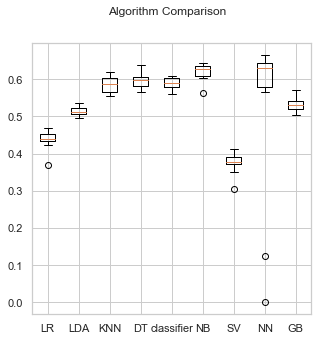

In [161]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) 
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6. Model <a id='section_id15'></a>

### 6.1 KNeighbors <a id='section_id16'></a>

In [162]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

#from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
print('rf Train accuracy is = {:.2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(pred_test,y_test)
print('rf Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

rf Train accuracy is = 76.44%
rf Test accuracy is = 66.15%
F1 Training set accuracy: 0.737
F1 Test set accuracy: 0.635


In [163]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
con_mat=confusion_matrix(y_test, pred_test)
print (confusion_matrix(y_test, pred_test))

[[878 403]
 [406 703]]


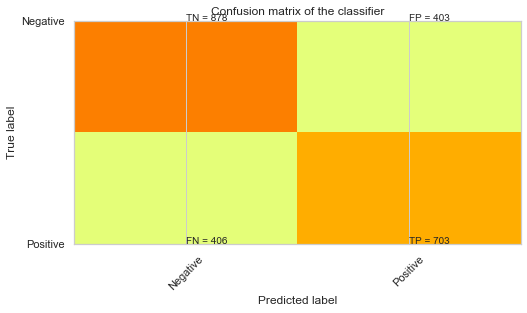

In [164]:
plt.rcParams['figure.figsize'] = (8, 5)
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [165]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1281
           1       0.64      0.63      0.63      1109

    accuracy                           0.66      2390
   macro avg       0.66      0.66      0.66      2390
weighted avg       0.66      0.66      0.66      2390
 



In [166]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = knn.predict_proba(features_train)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [167]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = knn.predict_proba(features_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

### 6.2 Randomforest <a id='section_id17'></a>

In [168]:
#classifier = RandomForestClassifier(random_state=7, max_features ='auto',max_depth= 17,min_samples_split =2,min_samples_leaf=3,bootstrap=True) #n_estimators=5, 

classifier = RandomForestClassifier()
#max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
#max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#bootstrap = [True, False]
classifier.fit(X_train,y_train)

pred_train = classifier.predict(X_train)
pred_test = classifier.predict(X_test)

#from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
print('rf Train accuracy is = {:.2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(pred_test,y_test)
print('rf Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

rf Train accuracy is = 97.03%
rf Test accuracy is = 68.03%
F1 Training set accuracy: 0.967
F1 Test set accuracy: 0.623


In [169]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
con_mat=confusion_matrix(y_test, pred_test)
print (confusion_matrix(y_test, pred_test))

[[995 286]
 [478 631]]


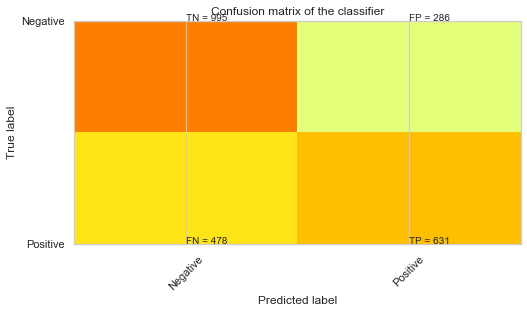

In [170]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [171]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.68      0.78      0.72      1281
           1       0.69      0.57      0.62      1109

    accuracy                           0.68      2390
   macro avg       0.68      0.67      0.67      2390
weighted avg       0.68      0.68      0.68      2390
 



In [172]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = classifier.predict_proba(features_train)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [173]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = classifier.predict_proba(features_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [174]:
#feature importance 
print(sorted(zip(map(lambda X:X , classifier.feature_importances_ ),X)))

[(0.004782601561285167, 'Television  Advertisement'), (0.010573741321327627, 'EnglishEducation_Graduate Degree'), (0.027625102814358527, 'Quality'), (0.03293333483101685, 'NumberChildrenAtHome'), (0.04557151084889086, 'TotalChildren'), (0.04609727404237236, 'NumberCarsOwned'), (0.07085515095137086, 'OrderQuantity_sum'), (0.10368618543885548, 'YearlyIncome'), (0.12461222561038524, 'diff_median'), (0.2057919463407254, 'Age'), (0.3274709262394116, 'SalesAmount_sum')]


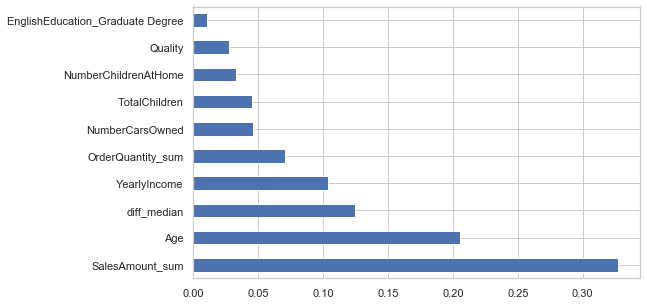

In [175]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 6.3 Decision Tree <a id='section_id18'></a>

In [176]:
DT = DecisionTreeClassifier(max_depth=13,random_state=40, criterion= "entropy", min_samples_split=9, splitter='best')

DT.fit(X_train,y_train)

pred_train = DT.predict(X_train)
pred_test = DT.predict(X_test)

#from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
print('rf Train accuracy is = {:.2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(pred_test,y_test)
print('rf Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

rf Train accuracy is = 72.16%
rf Test accuracy is = 65.31%
F1 Training set accuracy: 0.689
F1 Test set accuracy: 0.614


In [177]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
con_mat=confusion_matrix(y_test, pred_test)
print (confusion_matrix(y_test, pred_test))

[[903 378]
 [451 658]]


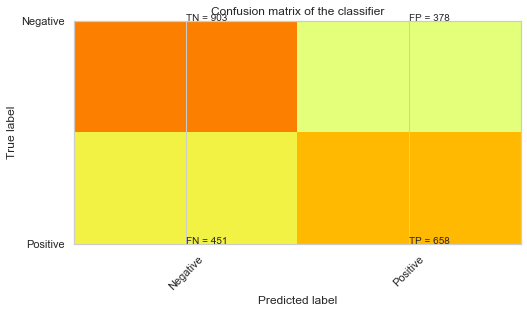

In [178]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [179]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      1281
           1       0.64      0.59      0.61      1109

    accuracy                           0.65      2390
   macro avg       0.65      0.65      0.65      2390
weighted avg       0.65      0.65      0.65      2390
 



In [180]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = DT.predict_proba(features_train)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [181]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = DT.predict_proba(features_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

### 6.4 Naive Bayes <a id='section_id19'></a>

In [182]:
nb = GaussianNB()

nb.fit(X_train,y_train)

pred_train = nb.predict(X_train)
pred_test = nb.predict(X_test)

#from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
print('rf Train accuracy is = {:.2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(pred_test,y_test)
print('rf Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

rf Train accuracy is = 55.08%
rf Test accuracy is = 54.60%
F1 Training set accuracy: 0.620
F1 Test set accuracy: 0.622


In [183]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
con_mat=confusion_matrix(y_test, pred_test)
print (confusion_matrix(y_test, pred_test))

[[411 870]
 [215 894]]


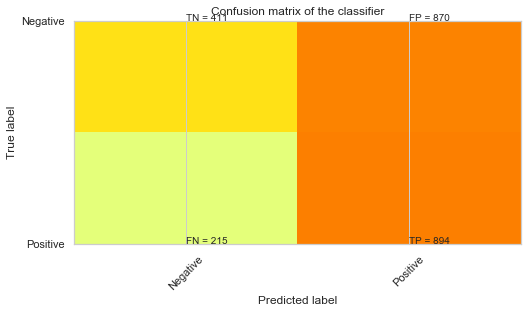

In [184]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [185]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.66      0.32      0.43      1281
           1       0.51      0.81      0.62      1109

    accuracy                           0.55      2390
   macro avg       0.58      0.56      0.53      2390
weighted avg       0.59      0.55      0.52      2390
 



In [186]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = nb.predict_proba(features_train)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [187]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = nb.predict_proba(features_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

### 6.5 Neural network <a id='section_id20'></a>

In [188]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

nn.fit(X_train,y_train)

pred_train = nn.predict(X_train)
pred_test = nn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
#accuracy = nn.score(X_test, y_test)
print('Train accuracy is = {:.2f}%'.format(accuracy_train*100))

accuracy_test = accuracy_score(pred_test,y_test)
#accuracy = nn.score(X_test, y_test)
print('Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

Train accuracy is = 47.13%
Test accuracy is = 48.03%
F1 Training set accuracy: 0.629
F1 Test set accuracy: 0.639


In [189]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
con_mat=confusion_matrix(y_test, pred_test)
print (confusion_matrix(y_test, pred_test))

[[  49 1232]
 [  10 1099]]


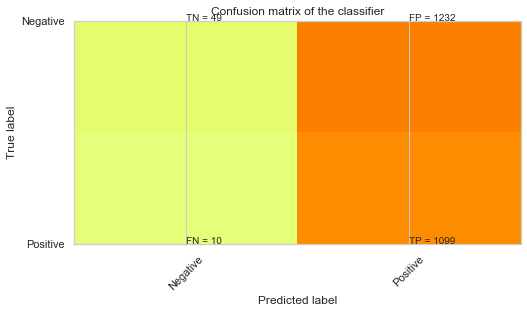

In [190]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [191]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.83      0.04      0.07      1281
           1       0.47      0.99      0.64      1109

    accuracy                           0.48      2390
   macro avg       0.65      0.51      0.36      2390
weighted avg       0.66      0.48      0.34      2390
 



### 6.6 Gradient Boosting <a id='section_id21'></a>

In [192]:
from sklearn.neural_network import MLPClassifier
gb = GradientBoostingClassifier()

nn.fit(X_train,y_train)

pred_train = nn.predict(X_train)
pred_test = nn.predict(X_test)

#from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
print('rf Train accuracy is = {:.2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(pred_test,y_test)
print('rf Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

rf Train accuracy is = 47.60%
rf Test accuracy is = 48.58%
F1 Training set accuracy: 0.629
F1 Test set accuracy: 0.639


### 6.7 Parameter Tuning (Random Forest Classifier)  <a id='section_id22'></a>
instead of randomly selecting the values of the parameters, a better approach would be to develop an algorithm which automatically finds the best parameters for a particular model. Grid Search is one such algorithm.

In [193]:
#RandomForest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# The scorers can be either be one of the predefined metric strings or a scorer
scoring = {'fbeta_score': make_scorer(fbeta_score,beta=1,average='binary')}

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                               scoring=scoring, refit='fbeta_score', #n_iter = 20, 
                               cv = 5, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train, y_train)

#To find the best accuracy achieved, execute the following code:
best_result = rf_random.best_score_  
print(best_result)

print(rf_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.4s finished


0.6085453180367045
{'n_estimators': 171, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [194]:
from sklearn.ensemble import RandomForestClassifier
rfp = RandomForestClassifier(**rf_random.best_params_)

rfp.fit(X_train,y_train)

pred_train = rfp.predict(X_train)
pred_test = rfp.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), rfp.predict_proba(X_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), rfp.predict_proba(X_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
#print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
#print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

0.9842000627812075 0.6736401673640168 0.9990400802333675 0.7630443979392227
F1 Training set accuracy: 0.983
F1 Test set accuracy: 0.633


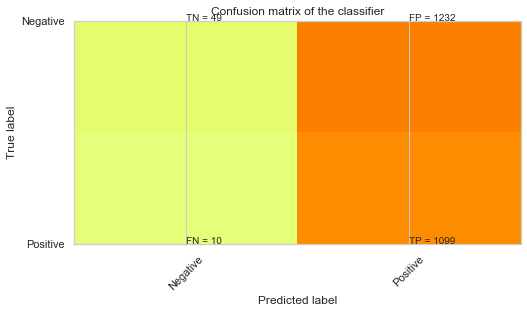

In [195]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [196]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1281
           1       0.66      0.61      0.63      1109

    accuracy                           0.67      2390
   macro avg       0.67      0.67      0.67      2390
weighted avg       0.67      0.67      0.67      2390
 



In [197]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = rfp.predict_proba(features_train)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [198]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = rfp.predict_proba(features_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [199]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=rfp, X=features_train, y=label_train, cv=10)
print(all_accuracies) 
#find the average of all the accuracies, simple use the mean() method of the object returned by cross_val_score
print(all_accuracies.mean()) 

[0.68305439 0.63912134 0.66631799 0.64330544 0.69874477 0.66631799
 0.65271967 0.68410042 0.68272251 0.65199161]
0.6668396135712972


### 6.7 Parameter Tuning(Decision Tree)  <a id='section_id23'></a>

## Gradient Boosting

In [201]:
# Decision Tree

# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# The scorers can be either be one of the predefined metric strings or a scorer
scoring = {'fbeta_score': make_scorer(fbeta_score,beta=1,average='binary')}

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [7, None],
              #"max_features": randint(1, 13),
              #"min_samples_leaf": randint(1, 13),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
#tree1=GradientBoostingClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist,scoring=scoring,refit='fbeta_score', cv=10)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None}
Best score is 0.6082695607279465


In [202]:
#from sklearn.ensemble import DecisionTreeClassifier
tree = DecisionTreeClassifier(**tree_cv.best_params_)
#tree = DecisionTreeClassifier(max_depth=12,  min_samples_leaf =1, criterion = 'gini', max_features = 11)
#'criterion': 'gini', 'max_depth': None, 'max_features': 11, 'min_samples_leaf': 1, n_estimators= 50,
tree.fit(X_train,y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), tree.predict_proba(X_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), tree.predict_proba(X_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

0.9876530291932615 0.6510460251046025 0.9996849295604683 0.6514149718188211
F1 Training set accuracy: 0.986
F1 Test set accuracy: 0.621


In [203]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1281
           1       0.63      0.62      0.62      1109

    accuracy                           0.65      2390
   macro avg       0.65      0.65      0.65      2390
weighted avg       0.65      0.65      0.65      2390
 



In [204]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = tree.predict_proba(features_train)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [205]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = tree.predict_proba(features_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

## Gradient Boosting

In [206]:
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier()

clf3.fit(features_train,label_train)

pred_train = clf3.predict(features_train)
pred_test = clf3.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf3.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf3.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print("F1 Training set accuracy: {:.3f}".format(fbeta_score(label_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(label_test, pred_test, beta=1)))

0.6834780788950507 0.6322175732217573 0.778012125218065 0.7165311144833387
F1 Training set accuracy: 0.601
F1 Test set accuracy: 0.516


### Gradient Boosting - Hyper parameter tuning

In [207]:
## from sklearn import cross_validation, metrics   
#from sklearn.grid_search import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 12, stop = 50, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 12, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf}

#gb = GradientBoostingClassifier()

gf_tune = GridSearchCV(estimator = clf3, param_grid = grid, cv = 5, verbose=2, n_jobs = -1)
gf_tune.fit(features_train, label_train)

print(gf_tune.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 49.4min finished


{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 45}


In [208]:
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(**gf_tune.best_params_)

clf3.fit(features_train,label_train)

pred_train = clf3.predict(features_train)
pred_test = clf3.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf3.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf3.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print("F1 Training set accuracy: {:.3f}".format(fbeta_score(label_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(label_test, pred_test, beta=1)))

0.9888040179972795 0.6715481171548117 0.9997332861607781 0.7574624744951604
F1 Training set accuracy: 0.988
F1 Test set accuracy: 0.614


In [209]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.54      0.59      0.56      1281
           1       0.47      0.41      0.44      1109

    accuracy                           0.51      2390
   macro avg       0.50      0.50      0.50      2390
weighted avg       0.51      0.51      0.51      2390
 



In [210]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = clf3.predict_proba(features_train)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [211]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = clf3.predict_proba(features_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

### 6.8 Final Model and Model Performance <a id='section_id24'></a>

In [212]:
#Train the final model on all the dataset
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()

rfp.fit(X, y)

pred_train = rfp.predict(X)
# predict test set
#pred_test= clf.predict(y)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train, y)
#accuracy_test = accuracy_score(pred_test, y)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y), rfp.predict_proba(X)[:,1])
auc_train = metrics.auc(fpr,tpr)


print(accuracy_train,auc_train)
print("F1 Train set accuracy: {:.3f}".format(fbeta_score(y, pred_train, beta=1)))
#print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y, pred_test, beta=1)))

0.9819201473173181 0.9988291163311246
F1 Train set accuracy: 0.980


### 6.10 Save Best Model <a id='section_id25'></a>

In [213]:
import pandas
from sklearn.externals import joblib

filename = 'Churn_model'
i = [d,rfp]
joblib.dump(i,filename)

C:\Users\Lenovo\New folder\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Churn_model']

# 7.Test <a id='section_id26'></a>

#### Lets testing the Hold out Dataset(Score_data)

### Score New Data

In [214]:
df1.dtypes

Age                                   int32
EnglishEducation_Graduate Degree      uint8
NumberCarsOwned                       int64
NumberChildrenAtHome                  int64
OrderQuantity_sum                     int64
Quality                             float64
SalesAmount_sum                     float64
Television  Advertisement           float64
TotalChildren                         int64
YearlyIncome                        float64
diff_median                         float64
Churn                                 int32
dtype: object

In [215]:
Score_data.columns

Index(['CustomerKey', 'SalesAmount_sum', 'SalesAmount_max', 'SalesAmount_min',
       'SalesAmount_mean', 'SalesAmount_median', 'OrderQuantity_sum',
       'OrderQuantity_max', 'OrderQuantity_min', 'OrderQuantity_mean',
       'OrderQuantity_median', 'OrderDate_max', 'diff_sum', 'diff_max',
       'diff_min', 'diff_mean', 'diff_median', 'BirthDate', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned',
       'DateFirstPurchase', 'Manufacturer', 'On Promotion', 'Other', 'Price',
       'Quality', 'Review', 'Television  Advertisement', 'Tenure', 'Age',
       'Last_purchase_date', 'Cuttoff_date', 'Churn', 'MaritalStatus_M',
       'MaritalStatus_S', 'Gender_F', 'Gender_M', 'EnglishEducation_Bachelors',
       'EnglishEducation_Graduate Degree', 'EnglishEducation_High School',
       'EnglishEducation_Partial College',
       'EnglishEducation_Partial High School', 'EnglishOccupation_Clerical',
       'EnglishOccupation_Management', 'EnglishOccupation_Manual'

### 7.1 Prepare score data<a id='section_id27'></a>

In [216]:
#Prepare score data to ensure the attributes of the modelling data matches that of the scoring data
#Score_data

#replace missing values with most frequent values
Score_data_sel = Score_data.fillna(Score_data.mode().iloc[0])

#Select features and target
Score_data_sel = Score_data_sel[['Age', 
'EnglishEducation_Graduate Degree', 
#'MaritalStatus_S',
'NumberCarsOwned', 
'NumberChildrenAtHome', 
'OrderQuantity_sum',
'Quality', 
'SalesAmount_sum', 
'Television  Advertisement',
'TotalChildren', 
'YearlyIncome', 
'diff_median']]


In [217]:
Score_data_sel.head()

,Age,EnglishEducation_Graduate Degree,NumberCarsOwned,NumberChildrenAtHome,OrderQuantity_sum,Quality,SalesAmount_sum,Television Advertisement,TotalChildren,YearlyIncome,diff_median
12982,53,0,1,0,2,0.00,548.98,0.00,2,10000.00,0.00
10010,41,0,0,1,1,0.00,4.99,0.00,1,20000.00,0.00
313,55,1,2,0,4,0.00,44.57,0.00,3,70000.00,101.50
9534,47,0,1,1,3,0.00,23.97,0.00,2,60000.00,0.00
11535,27,0,0,1,2,0.00,1750.98,0.00,1,40000.00,0.00


In [218]:
Score_data_sel.dtypes

Age                                   int32
EnglishEducation_Graduate Degree      uint8
NumberCarsOwned                       int64
NumberChildrenAtHome                  int64
OrderQuantity_sum                     int64
Quality                             float64
SalesAmount_sum                     float64
Television  Advertisement           float64
TotalChildren                         int64
YearlyIncome                        float64
diff_median                         float64
dtype: object

### 7.2 load the saved model <a id='section_id28'></a>

In [219]:
# Use the code to load the model
filename = 'Churn_model'

from sklearn.externals import joblib
d,rfp=joblib.load(filename)

In [220]:
def score_new(Score_data_sel,rfp):
    score = pd.DataFrame(rfp.predict_proba(Score_data_sel)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),11,labels=range(11,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    return(score)

In [221]:
scores = score_new(Score_data_sel,rfp)
scores

,SCORE,DECILE
0,0.72,2.00
1,0.36,5.00
2,0.09,9.00
3,0.39,5.00
4,0.65,2.00
...,...,...
6532,0.18,8.00
6533,0.27,6.00
6534,0.40,5.00
6535,0.01,11.00


In [222]:
# How many 0s and 1s are there

print('There are', np.count_nonzero(pred_train == 0), '0s')

print('There are', np.count_nonzero(pred_train == 1), '1s')

There are 6505 0s
There are 5442 1s


### 7.3 Fit the model <a id='section_id29'></a>

In [223]:
#Score the final model (RandomForest) 
pred = rfp.predict(Score_data_sel)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [224]:
# Probability for Test Data Set
#proba = rf.predict_proba(Score_data_sel)
#proba

In [225]:
# Creating Data Frame for prediction
#prediction  = pd.DataFrame(pred)
#prediction.head()

In [226]:
# Prediction columns name came as "0"
# Lets rename to 'PROSPECTIVE_DONOR' 
#prediction.rename(columns = {0: 'Churn'}, inplace = True)
#prediction.head()

In [227]:
# Put the result in a dataframe

#pd.DataFrame({'Customer_ID':non_churners_score.Customer_ID,'Churn_Flag':DecTree_score_pred}).to_csv('Predicted Churners.csv',index=False)
# Store the result in a csv file
#, 'Score':scores.SCORE, 'Decile':scores.DECILE
Final = pd.DataFrame({'CustomerKey':Score_data.CustomerKey,'Churn_Flag':pred})

In [228]:
Final.head()

,CustomerKey,Churn_Flag
12982,23982,1
10010,21010,0
313,11313,0
9534,20534,0
11535,22535,1


In [229]:
# Merge the Final data to the custtbl to do some demographics profiling
Final_ouput = pd.merge(customer,
                 Final,
                 on='CustomerKey',how = 'inner')
Final_ouput.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,Churn_Flag
0,11012,1979-01-14,M,F,100000.00,2,0,Bachelors,Management,1,2,2013-03-16,1-2 Miles,0
1,11013,1979-08-03,M,M,100000.00,2,0,Bachelors,Management,1,3,2013-04-13,0-1 Miles,0
2,11018,1955-10-06,S,M,30000.00,2,0,Partial College,Clerical,1,2,2011-01-17,5-10 Miles,0
3,11019,1983-09-04,S,M,40000.00,0,0,High School,Skilled Manual,0,2,2013-02-12,5-10 Miles,0
4,11023,1984-04-09,M,M,40000.00,0,0,Partial College,Skilled Manual,1,1,2013-02-17,1-2 Miles,0


In [230]:
Final_ouput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6537 entries, 0 to 6536
Data columns (total 14 columns):
CustomerKey             6537 non-null int64
BirthDate               6537 non-null object
MaritalStatus           6537 non-null object
Gender                  6537 non-null object
YearlyIncome            6537 non-null float64
TotalChildren           6537 non-null int64
NumberChildrenAtHome    6537 non-null int64
EnglishEducation        6537 non-null object
EnglishOccupation       6537 non-null object
HouseOwnerFlag          6537 non-null object
NumberCarsOwned         6537 non-null int64
DateFirstPurchase       6537 non-null object
CommuteDistance         6537 non-null object
Churn_Flag              6537 non-null int32
dtypes: float64(1), int32(1), int64(4), object(8)
memory usage: 740.5+ KB


In [231]:
#scores.count()
#pred_train.count()
#Score_data.CustomerKey.count()
#Final.head(5)
#clf.predict_proba(features)
#clf.predict_proba(features)[:,1]
prob = scores[['SCORE']].values.squeeze()
prob

array([0.71734893, 0.35916179, 0.08528265, ..., 0.40204678, 0.0082846 ,
       0.09502924])

In [232]:
#, 'Score':scores.SCORE, 'Decile':scores.DECILE
#Final_ = pd.DataFrame({'CustomerKey':Score_data.CustomerKey,'Score':clf.predict_proba(features)[:,1]})
#Final_ = pd.DataFrame({'CustomerKey':Score_data.CustomerKey,'SCORE':clf.predict_proba(features)[:,1]})
Final_Output_Data = pd.DataFrame({'CustomerKey':Score_data.CustomerKey,'Churn_Probability':prob})
Final_Output_Data.head()

,CustomerKey,Churn_Probability
12982,23982,0.72
10010,21010,0.36
313,11313,0.09
9534,20534,0.39
11535,22535,0.65


In [233]:
Final_Output_Data.head()

,CustomerKey,Churn_Probability
12982,23982,0.72
10010,21010,0.36
313,11313,0.09
9534,20534,0.39
11535,22535,0.65


In [234]:
# Merge the probabilities to the
Final = pd.merge(Final_ouput,
                 Final_Output_Data,
                 on='CustomerKey',how = 'inner')
Final

,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,Churn_Flag,Churn_Probability
0,11012,1979-01-14,M,F,100000.00,2,0,Bachelors,Management,1,2,2013-03-16,1-2 Miles,0,0.07
1,11013,1979-08-03,M,M,100000.00,2,0,Bachelors,Management,1,3,2013-04-13,0-1 Miles,0,0.09
2,11018,1955-10-06,S,M,30000.00,2,0,Partial College,Clerical,1,2,2011-01-17,5-10 Miles,0,0.05
3,11019,1983-09-04,S,M,40000.00,0,0,High School,Skilled Manual,0,2,2013-02-12,5-10 Miles,0,0.00
4,11023,1984-04-09,M,M,40000.00,0,0,Partial College,Skilled Manual,1,1,2013-02-17,1-2 Miles,0,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6532,29461,1983-04-08,M,M,10000.00,0,0,High School,Manual,1,2,2013-10-19,0-1 Miles,0,0.21
6533,29464,1983-03-05,S,M,10000.00,1,1,High School,Manual,0,0,2013-10-15,1-2 Miles,0,0.27
6534,29465,1982-12-17,S,M,20000.00,0,0,Partial College,Manual,1,0,2013-10-20,0-1 Miles,0,0.44
6535,29469,1977-10-20,M,F,30000.00,3,0,Graduate Degree,Clerical,0,0,2013-06-16,0-1 Miles,0,0.43


# 8.Visualise Churn <a id='section_id30'></a>

In [235]:
Final.groupby('Churn_Flag').size()

Churn_Flag
0    4728
1    1809
dtype: int64

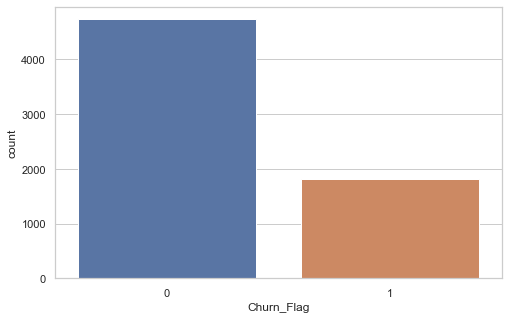

In [236]:
# visualistaion where 0 is not Churn and 1 is Churn Predicted
sns.countplot(x="Churn_Flag",data=Final)

In [237]:
Final.groupby('Churn_Probability').size()

Churn_Probability
0.00    41
0.00    12
0.00    15
0.00    11
0.00     8
        ..
0.99     1
0.99     1
0.99     1
1.00     1
1.00     4
Length: 3449, dtype: int64

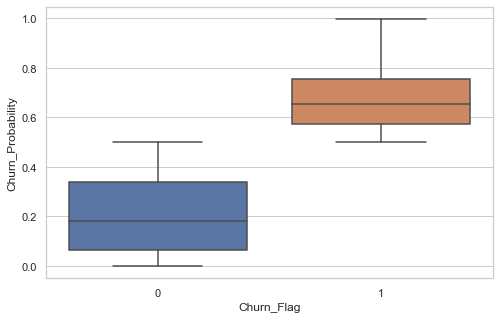

In [238]:
# visualistaion where 0 is not Churn and 1 is Churn Predicted
sns.boxplot(x=Final['Churn_Flag'], y=Final['Churn_Probability'])
#sns.countplot(x="Churn_Probability",hue="Churn_Flag",data=Final)

In [239]:
# Lets find out average Sales Amount for customers
Score_data.SalesAmount_sum.mean()

1639.7663869818687

In [240]:
# Lets find out average Sales Amount for customers
Score_data.OrderQuantity_sum .mean()

3.516903778491663

In [241]:
#Timebtworders(['CustomerKey','SalesOrderNumber']).mean()
#Aggregating new data frame (Timebtworders) by salesamount and orderquantity
Timebtworders = Timebtworders.groupby(['CustomerKey']).agg({'SalesOrderNumber':'sum'})
Timebtworders

,SalesOrderNumber
CustomerKey,
11000,SO43793SO51522SO57418
11001,SO43767SO51493SO72773
11002,SO43736SO51238SO53237
11003,SO43701SO51315SO57783
11004,SO43810SO51595SO57293
...,...
29479,SO49617
29480,SO62341
29481,SO45427


### Total Customers of Churn probability is 1809 * Average sales amount is 1640 =
# 2.9 Milion